In [3]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from scipy.stats import pearsonr

import ptitprince as pt

In [4]:
path = 'dataset.parquet'

df = pd.read_parquet(path)
df

time  sample  anomaly  category  setting  action  active  \
0         0.000000       0     True         0        0       0       0   
1         0.010047       0     True         0        0       0       0   
2         0.020135       0     True         0        0       0       0   
3         0.030203       0     True         0        0       0       0   
4         0.040257       0     True         0        0       0       0   
...            ...     ...      ...       ...      ...     ...     ...   
2321685  10.716863    2121    False        12       76      13       1   
2321686  10.726921    2121    False        12       76      13       1   
2321687  10.737022    2121    False        12       76      13       1   
2321688  10.747115    2121    False        12       76      13       1   
2321689  10.757177    2121    False        12       76      13       1   

         robot_voltage  robot_current  io_current  ...  torque_sensor_a_6  \
0            48.582687       0.322263    0.087890  ...           0.069086   
1            48.582687       0.527340    0.087890  ...           0.055269   
2            48.561890       0.380857    0.087890  ...           0.060796   
3            48.582687       0.483395    0.087890  ...           0.046979   
4            48.582687       0.307615    0.087890  ...           0.046979   
...                ...            ...         ...  ...                ...   
2321685      48.561890       0.688472    0.087890  ...           0.055269   
2321686      48.561890       0.644527    0.073242  ...           0.041452   
2321687      48.541092       0.908197    0.087890  ...           0.066323   
2321688      48.582687       0.688472    0.117187  ...           0.069086   
2321689      48.582687       0.703120    0.087890  ...           0.066323   

         torque_sensor_b_6  motor_iq_6  motor_id_6  power_motor_el_6  \
0                -0.066240    0.161936   -0.019600          0.115915   
1                -0.063480    0.142992    0.020944          0.134123   
2                -0.080041    0.145380    0.011475          0.115405   
3                -0.066240    0.147767    0.002005          0.097916   
4                -0.074521    0.147767    0.002005          0.104346   
...                    ...         ...         ...               ...   
2321685          -0.063480    0.133460    0.024379          0.103935   
2321686          -0.044160    0.142870    0.021766          0.078053   
2321687          -0.049680    0.124408   -0.008216          0.080420   
2321688          -0.044160    0.124408   -0.008216          0.092157   
2321689          -0.052440    0.131376   -0.001374          0.073302   

         power_motor_mech_6  power_load_mech_6  motor_voltage_6  \
0                       0.0       1.157006e-05         0.729223   
1                       0.0      -7.832955e-07         0.630203   
2                       0.0       4.344085e-07         0.620702   
3                       0.0       2.882664e-06         0.623614   
4                       0.0       6.304338e-07         0.499930   
...                     ...                ...              ...   
2321685                 0.0      -1.502957e-05         0.595642   
2321686                 0.0       7.213437e-07         0.517480   
2321687                 0.0       9.829410e-06         0.496470   
2321688                 0.0       7.721170e-06         0.817346   
2321689                 0.0       8.201027e-06         0.466415   

         supply_voltage_6  brake_voltage_6  
0               47.783798        11.177029  
1               47.783798        10.976003  
2               47.803898        11.217231  
3               47.783798        11.177029  
4               47.803898        11.156923  
...                   ...              ...  
2321685         47.803898        11.217231  
2321686         47.803898        10.976000  
2321687         47.783798        11.197131  
2321688         47.783798        11.116721  
2321689         47.783798        11

In [5]:
# Excluding ['time','sample','category','setting','action','active']
df = df.drop(['sample','category','setting','action','active'], axis=1)

# Converting the column 'anomaly' from boolean to int
df['anomaly'] = df['anomaly'].astype(int)

df

time  anomaly  robot_voltage  robot_current  io_current  \
0         0.000000        1      48.582687       0.322263    0.087890   
1         0.010047        1      48.582687       0.527340    0.087890   
2         0.020135        1      48.561890       0.380857    0.087890   
3         0.030203        1      48.582687       0.483395    0.087890   
4         0.040257        1      48.582687       0.307615    0.087890   
...            ...      ...            ...            ...         ...   
2321685  10.716863        0      48.561890       0.688472    0.087890   
2321686  10.726921        0      48.561890       0.644527    0.073242   
2321687  10.737022        0      48.541092       0.908197    0.087890   
2321688  10.747115        0      48.582687       0.688472    0.117187   
2321689  10.757177        0      48.582687       0.703120    0.087890   

         system_current  target_position_1  target_velocity_1  \
0              0.278318          -0.341433               -0.0   
1              0.410153          -0.341433               -0.0   
2              0.292967          -0.341433               -0.0   
3              0.263670          -0.341433               -0.0   
4              0.263670          -0.341433               -0.0   
...                 ...                ...                ...   
2321685        0.263670          -0.341433               -0.0   
2321686        0.219725          -0.341433               -0.0   
2321687        0.263670          -0.341433               -0.0   
2321688        0.278318          -0.341433               -0.0   
2321689        0.278318          -0.341433               -0.0   

         target_acceleration_1  target_torque_1  ...  torque_sensor_a_6  \
0                         -0.0         0.127406  ...           0.069086   
1                         -0.0         0.314227  ...           0.055269   
2                         -0.0         0.002657  ...           0.060796   
3                         -0.0        -0.128248  ...           0.046979   
4                         -0.0         0.097738  ...           0.046979   
...                        ...              ...  ...                ...   
2321685                   -0.0        -1.652499  ...           0.055269   
2321686                   -0.0        -1.703043  ...           0.041452   
2321687                   -0.0        -1.405120  ...           0.066323   
2321688                   -0.0        -1.668486  ...           0.069086   
2321689                   -0.0        -1.634014  ...           0.066323   

         torque_sensor_b_6  motor_iq_6  motor_id_6  power_motor_el_6  \
0                -0.066240    0.161936   -0.019600          0.115915   
1                -0.063480    0.142992    0.020944          0.134123   
2                -0.080041    0.145380    0.011475          0.115405   
3                -0.066240    0.147767    0.002005          0.097916   
4                -0.074521    0.147767    0.002005          0.104346   
...                    ...         ...         ...               ...   
2321685          -0.063480    0.133460    0.024379          0.103935   
2321686          -0.044160    0.142870    0.021766          0.078053   
2321687          -0.049680    0.124408   -0.008216          0.080420   
2321688          -0.044160    0.124408   -0.008216          0.092157   
2321689          -0.052440    0.131376   -0.001374          0.073302   

         power_motor_mech_6  power_load_mech_6  motor_voltage_6  \
0                       0.0       1.157006e-05         0.729223   
1                       0.0      -7.832955e-07         0.630203   
2                       0.0       4.344085e-07         0.620702   
3                       0.0       2.882664e-06         0.623614   
4                       0.0       6.304338e-07         0.499930   
...                     ...                ...              ...   
2321685                 0.0      -1.502957e-05         0.595642   
2321686                 0.0       7.213437e-07        

## Distributions of data

In [18]:
def plot_dist_btw_anomaly_normal(df, predictor, save=True):
    """
    Plot the distribution of the data
    """

    data = df.copy()
    data['anomaly'] = data['anomaly'].apply(lambda x: 'Anomalous' if x == 1 else 'Normal')
    category_order = ["Anomalous", "Normal"]
    
    sns.set(font="Arial", style="ticks")
    sns.set_context("paper", font_scale=1.3)

    colors = sns.color_palette("hls", 8)
    red = colors[0]
    green = colors[3]
    colors_list = [red, green]

    ax = plt.axes()
    sns.histplot(data, 
                 x=predictor,
                 hue='anomaly',
                 hue_order=category_order,
                 kde=True,
                 fill= True,
                 palette=colors_list,
                 bins=50,
                 alpha=0.5,
                 linewidth=0)

    ax.set_title(f'Distribution of {predictor}', fontsize=14)
    ax.set_ylabel('Density')
    ax.tick_params(axis='x', which='minor', length=3, width=1)

    if save:
        if not os.path.exists('figures/distribution'):
            os.makedirs('figures/distribution')
        plt.savefig('figures/distribution/' + predictor + '.png', dpi=1200)

    plt.show()

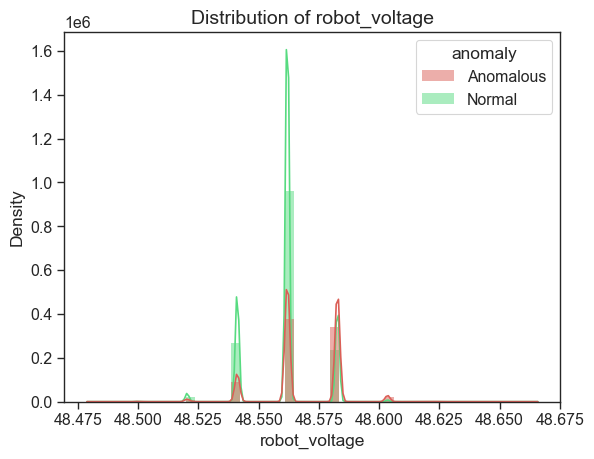

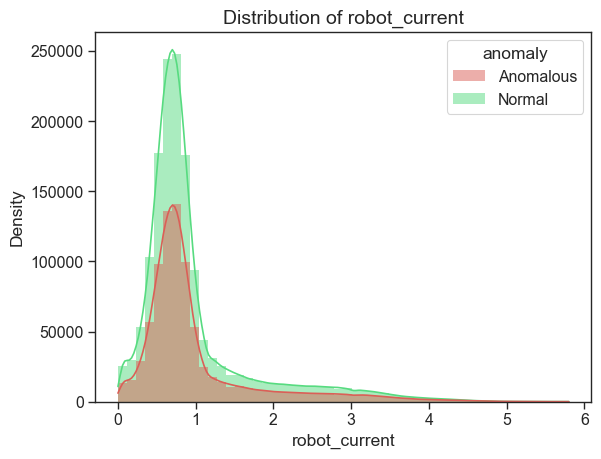

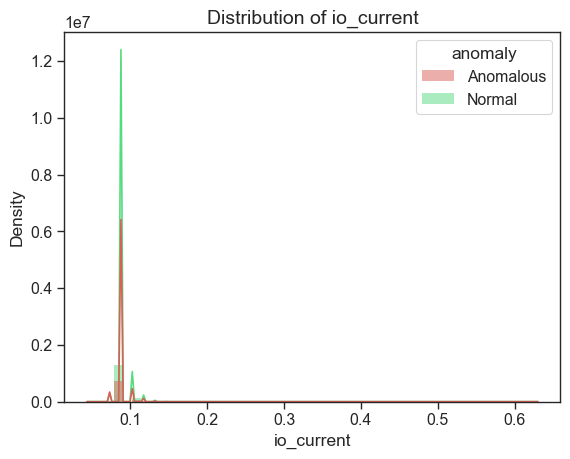

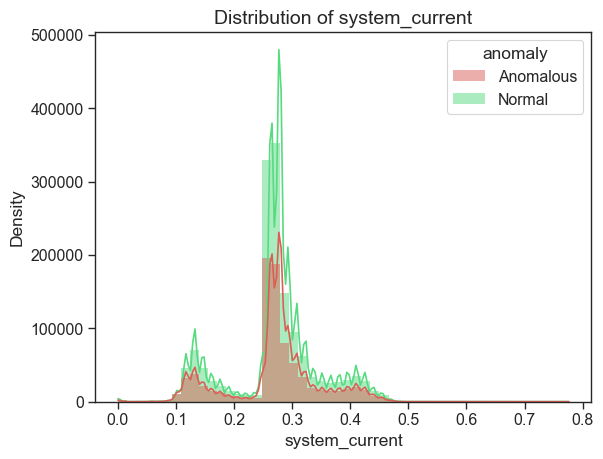

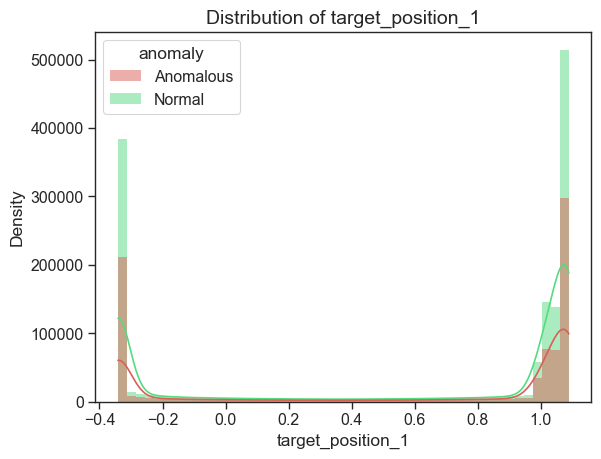

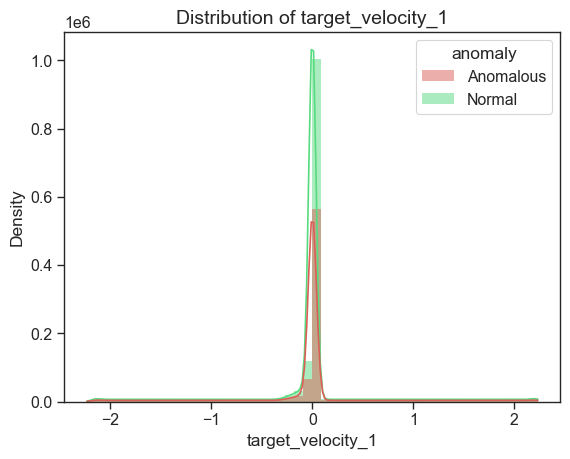

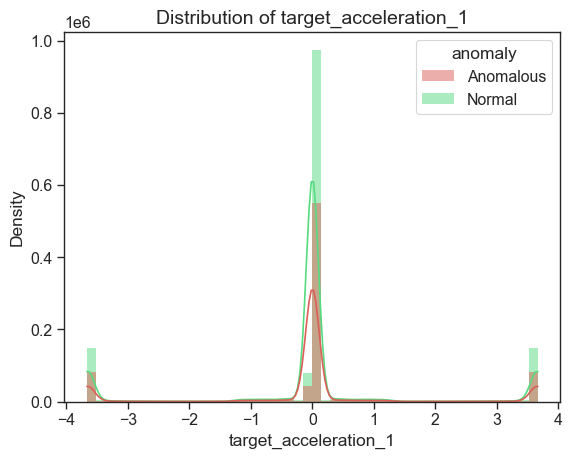

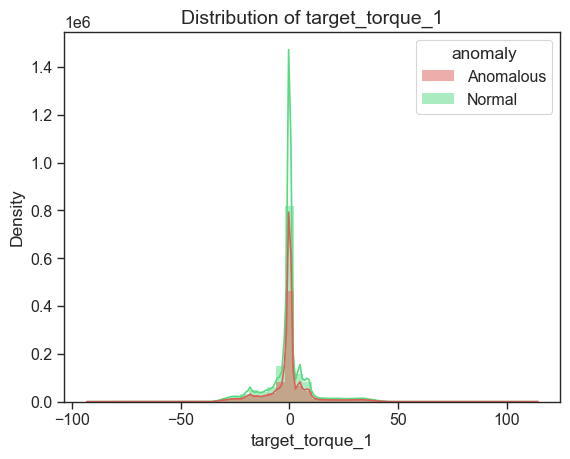

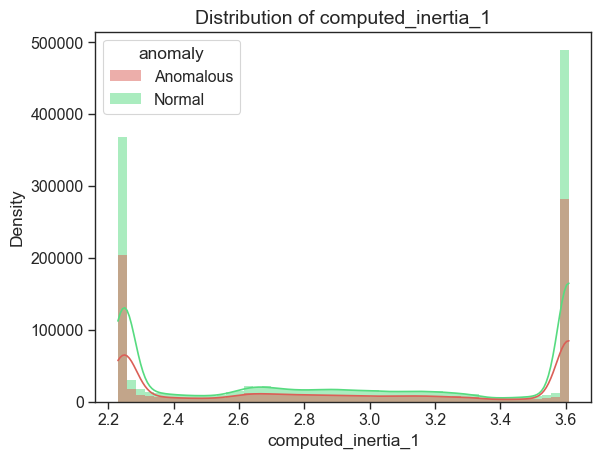

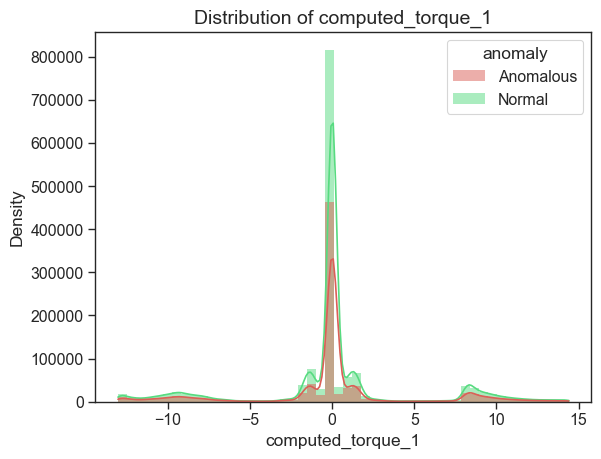

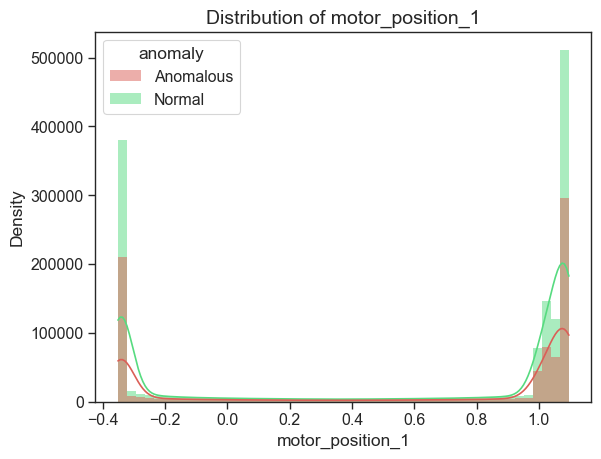

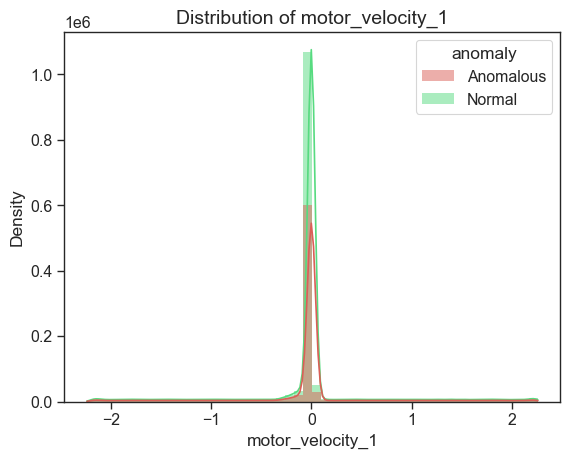

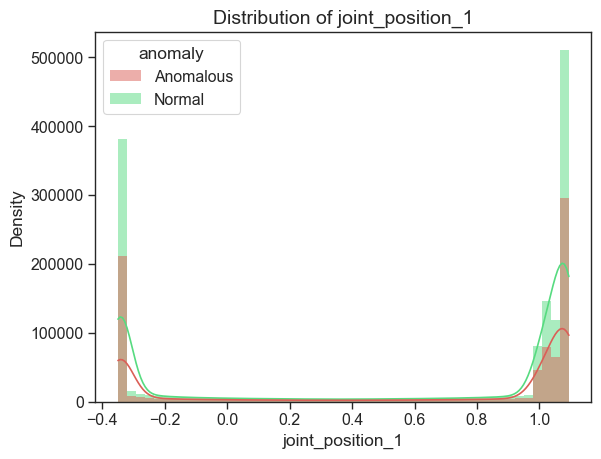

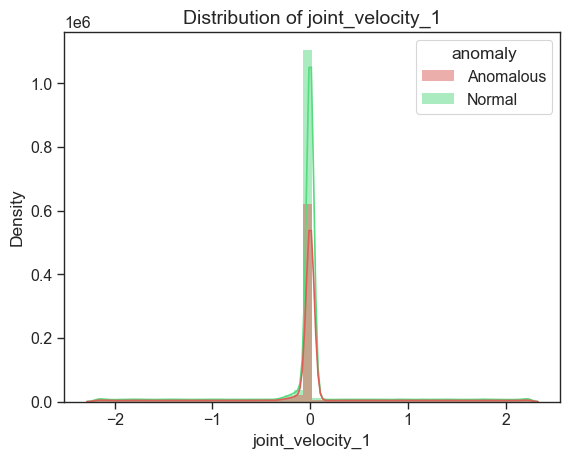

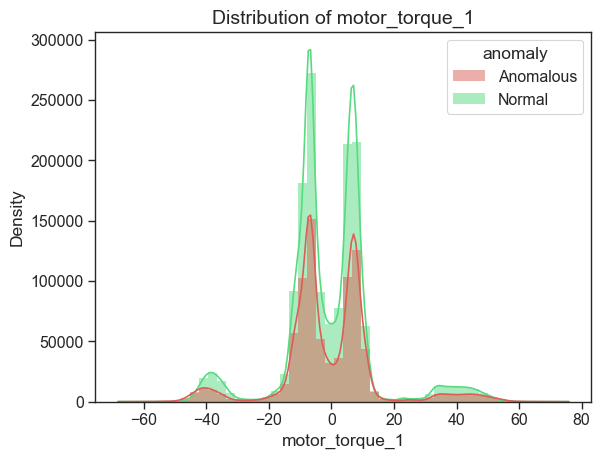

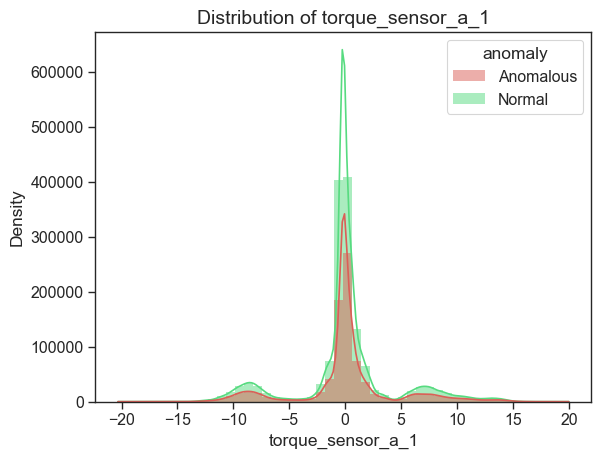

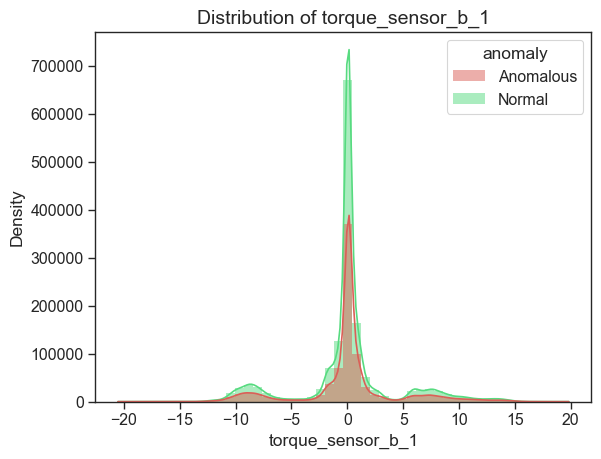

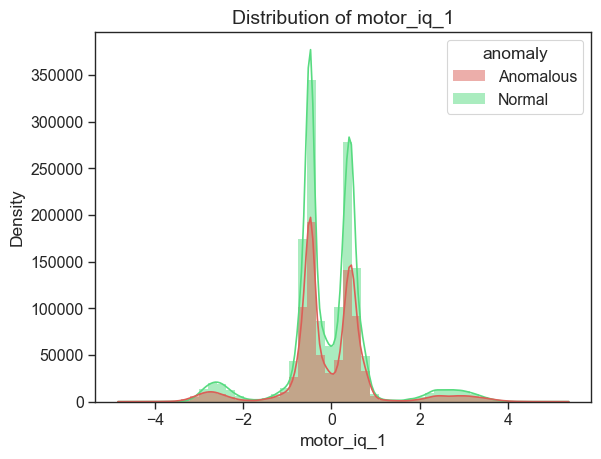

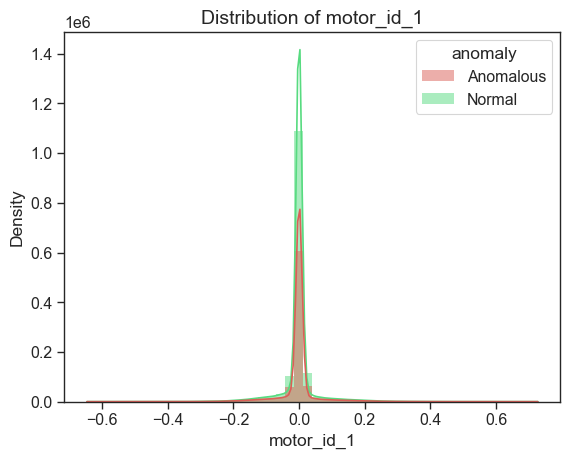

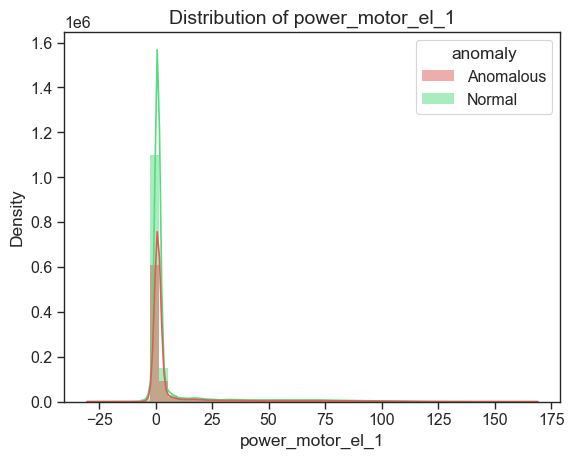

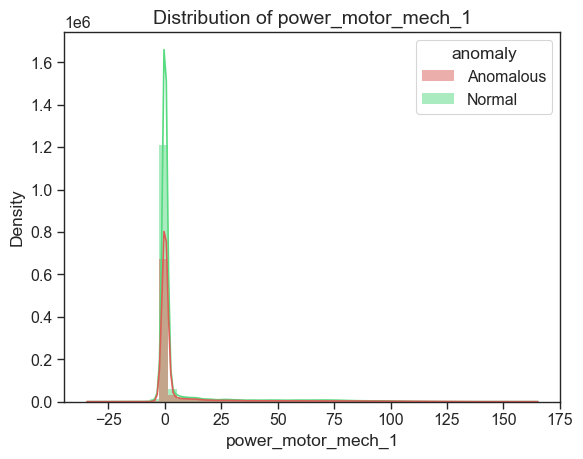

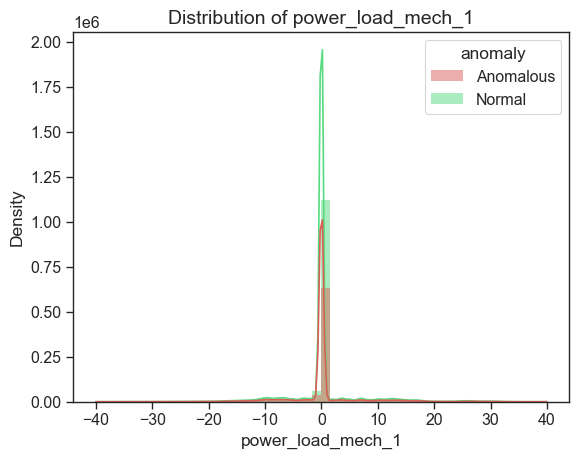

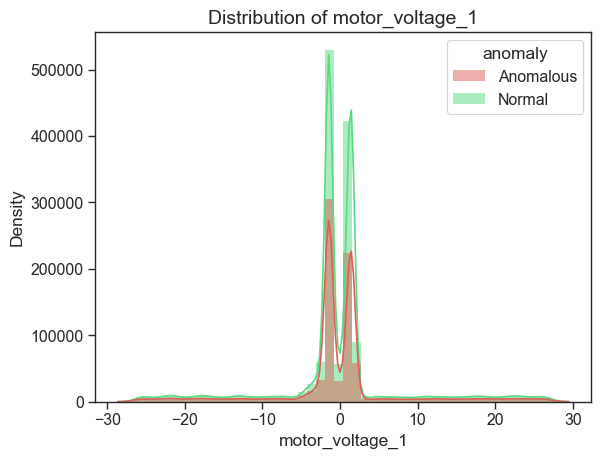

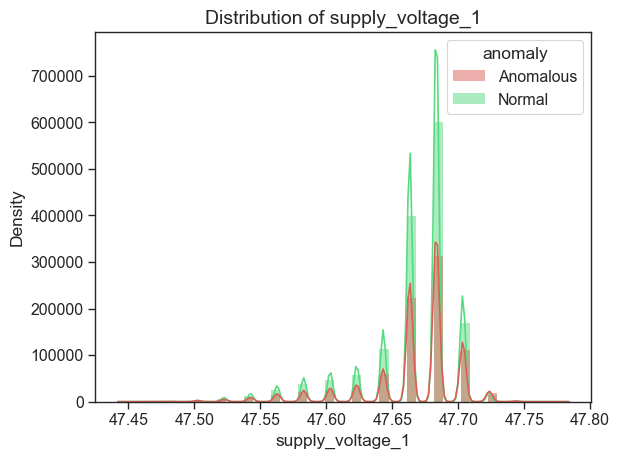

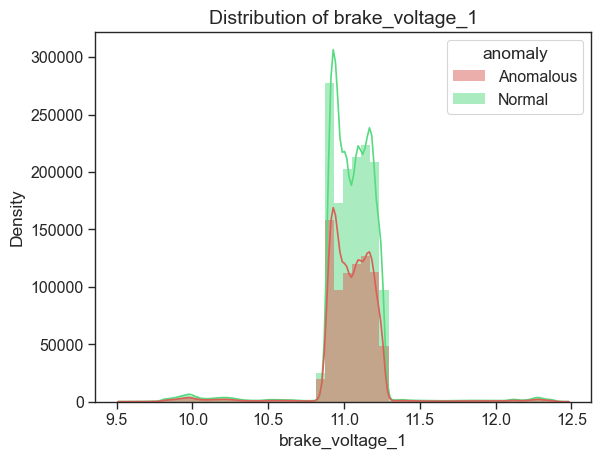

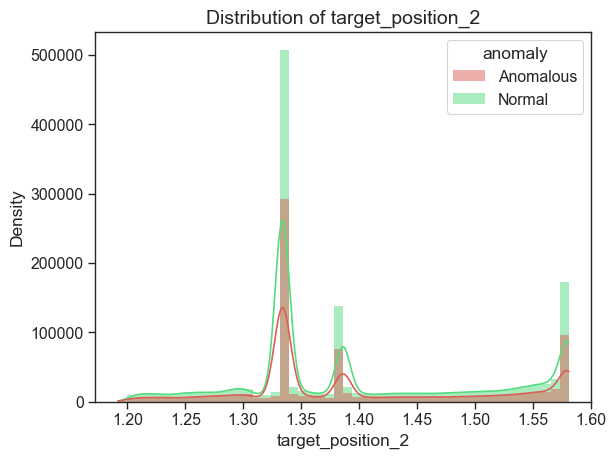

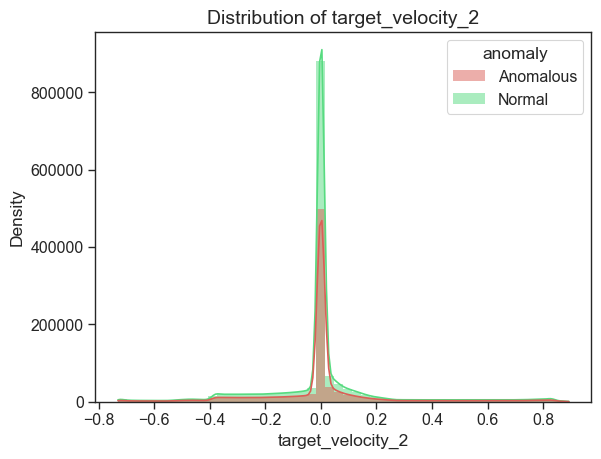

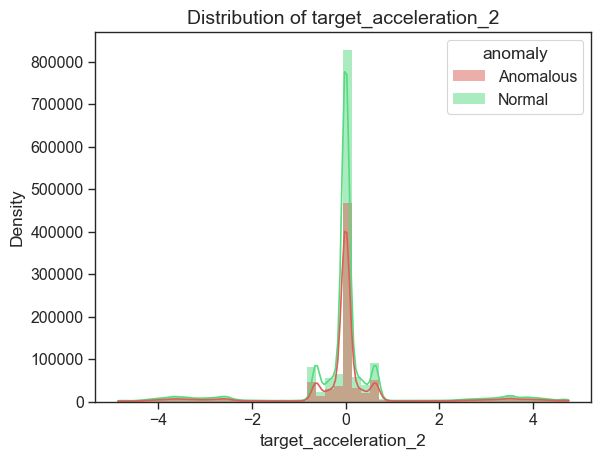

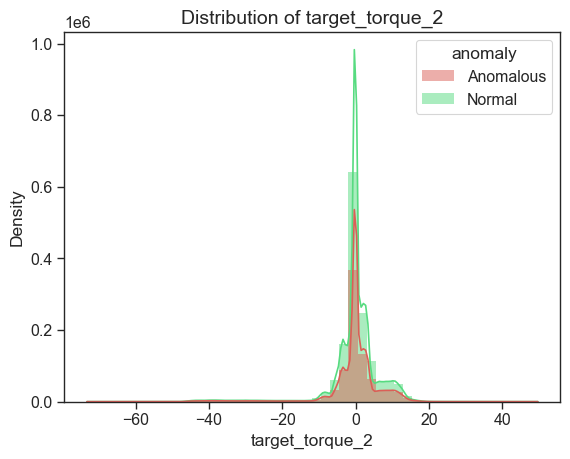

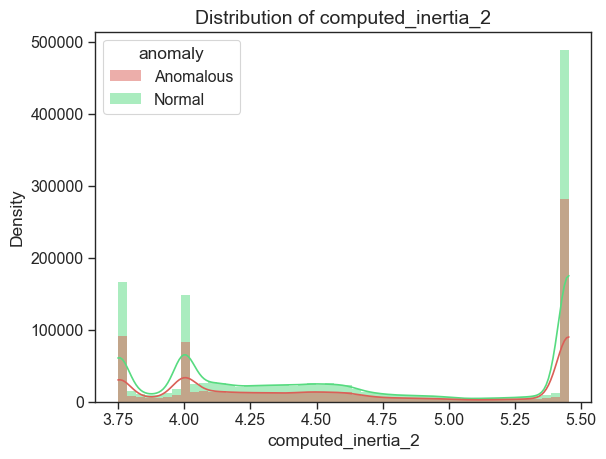

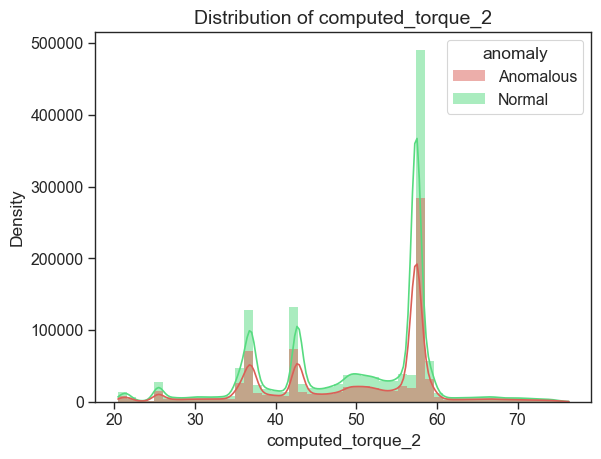

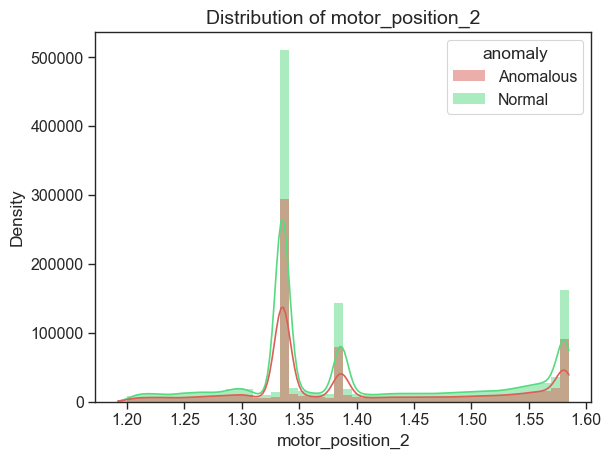

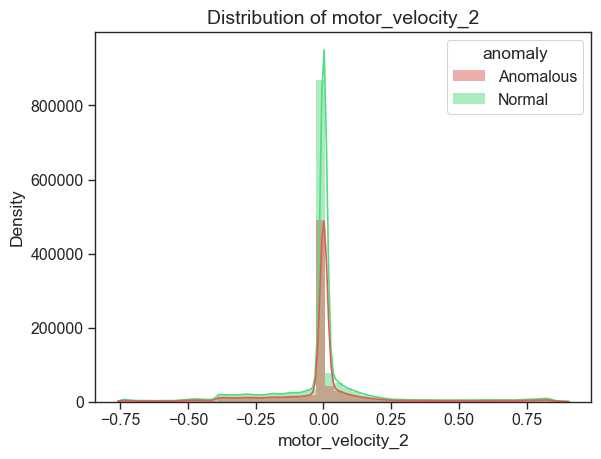

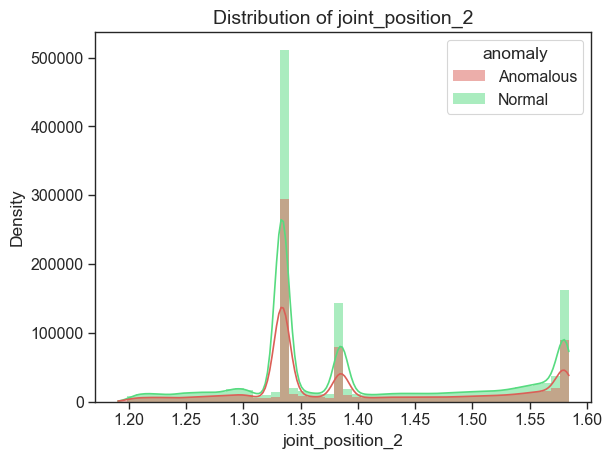

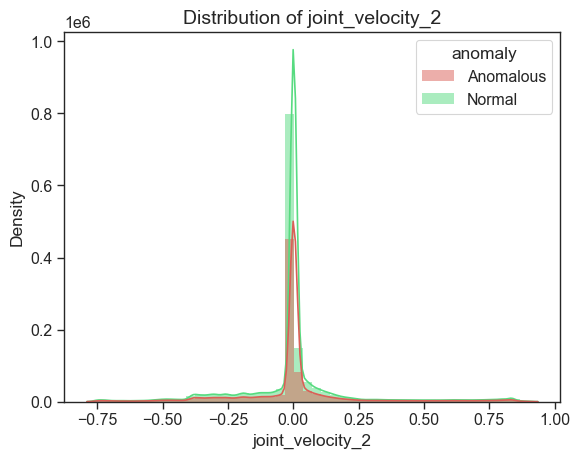

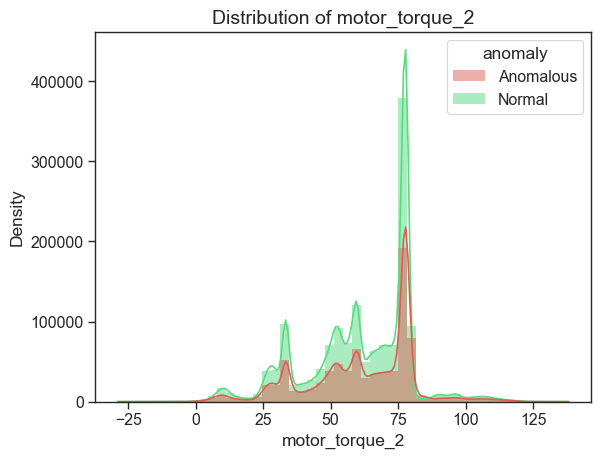

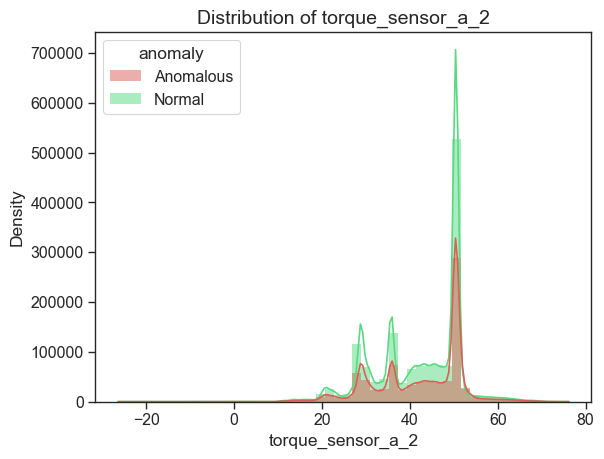

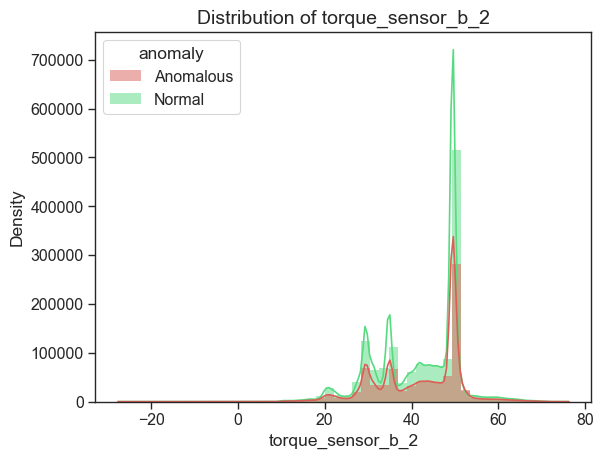

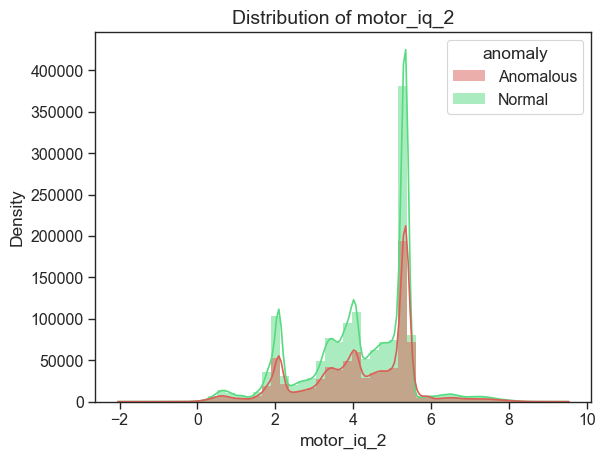

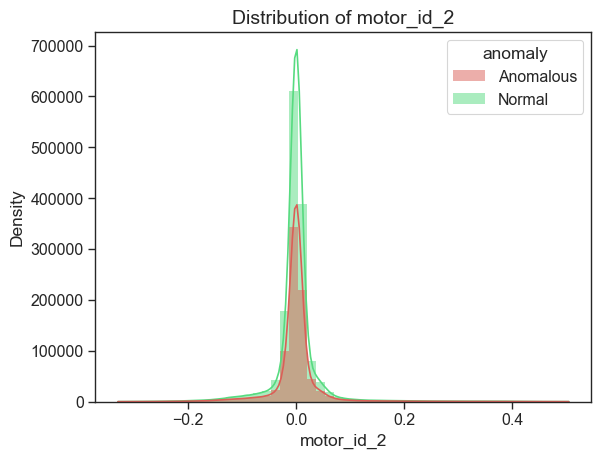

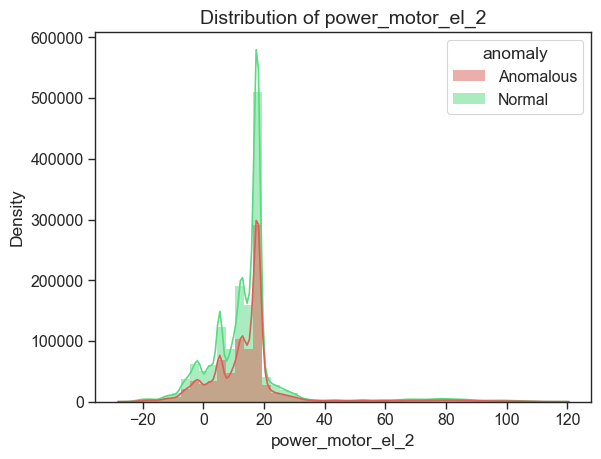

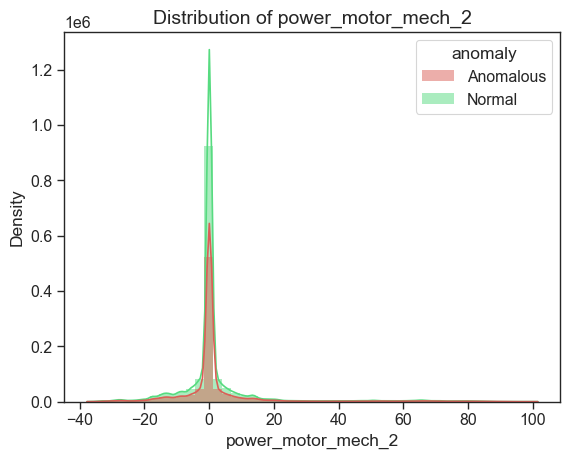

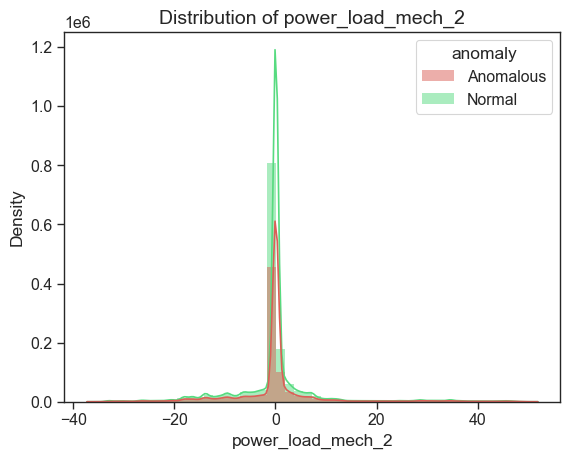

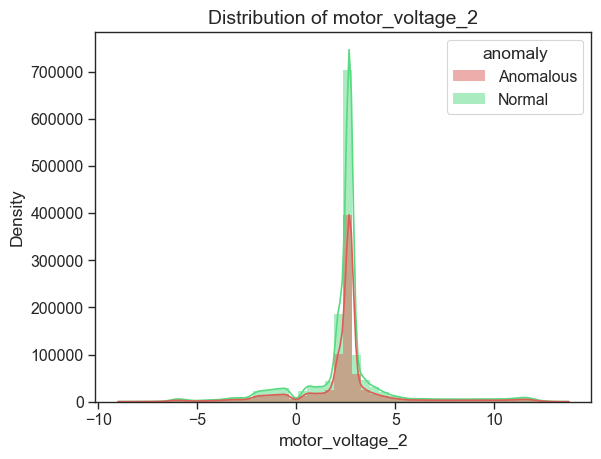

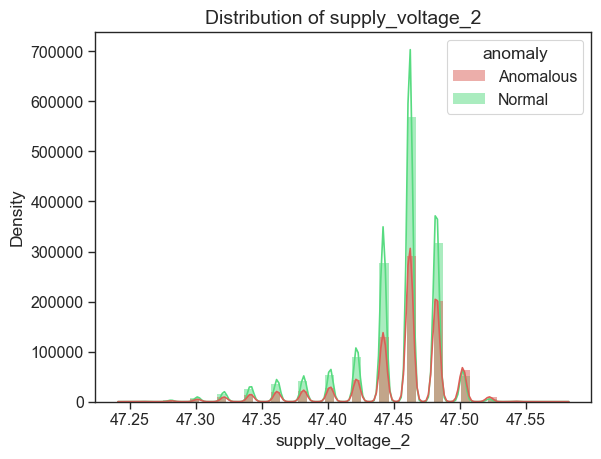

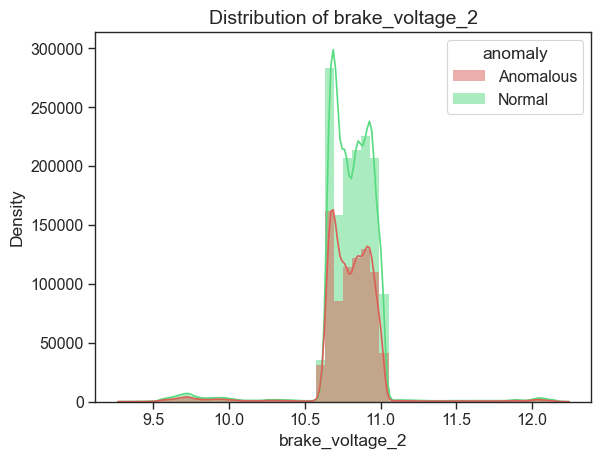

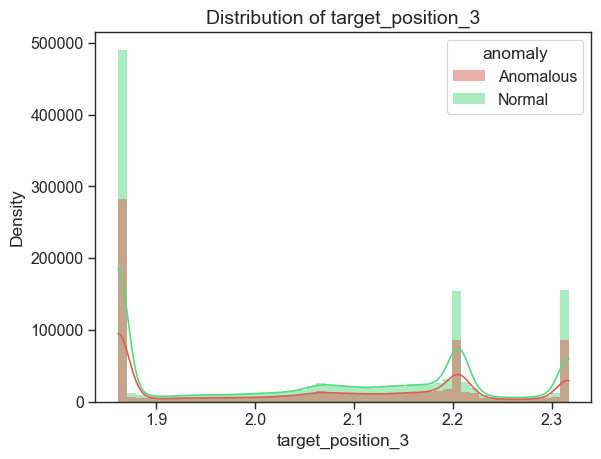

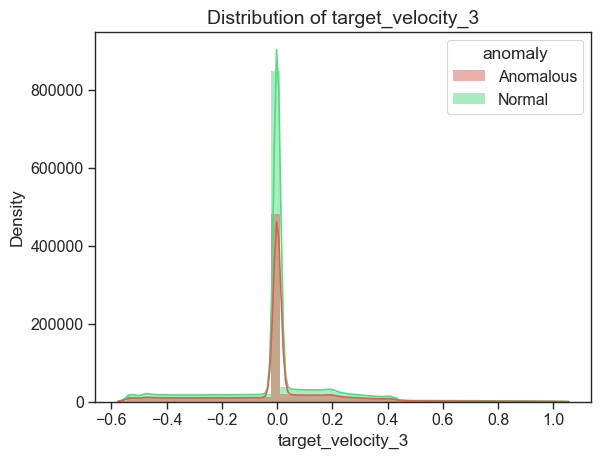

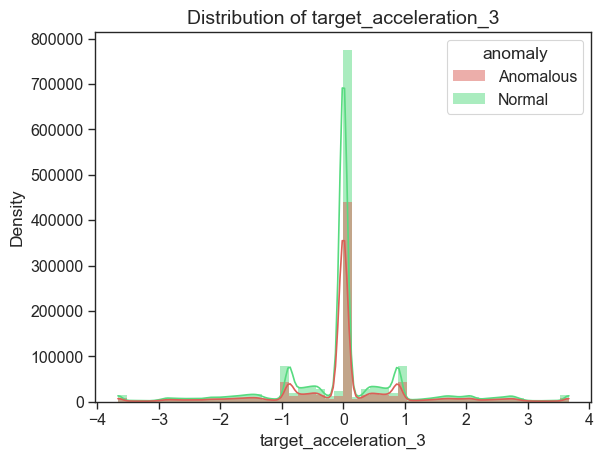

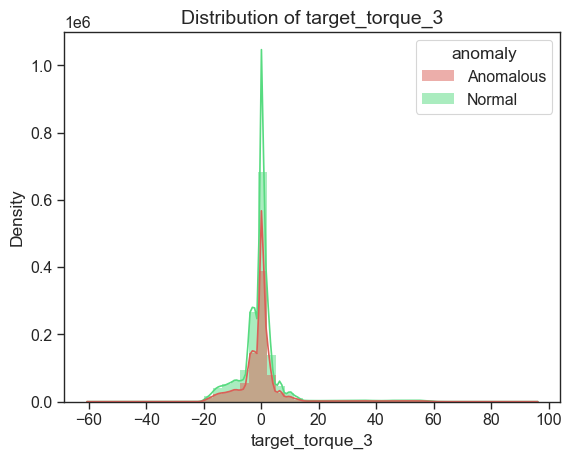

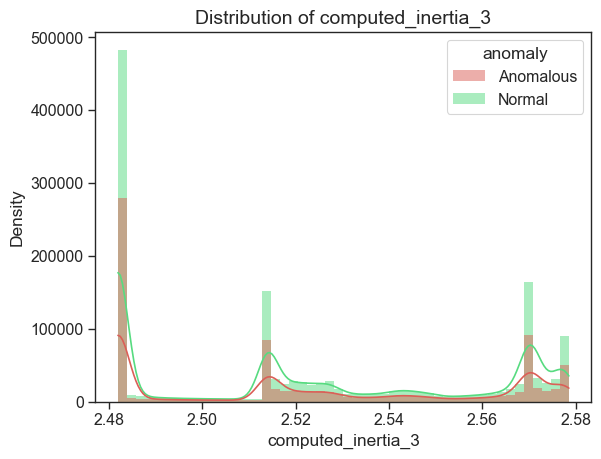

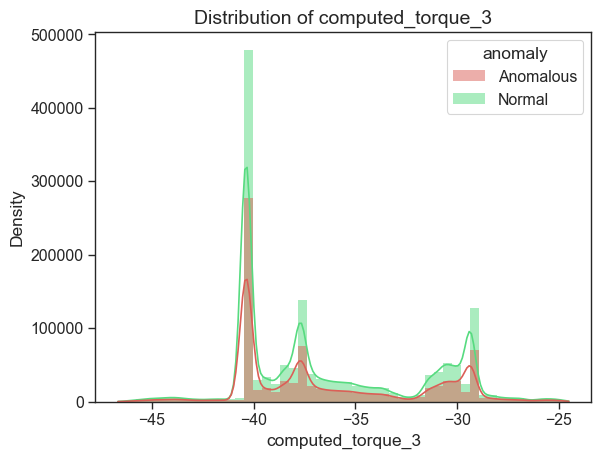

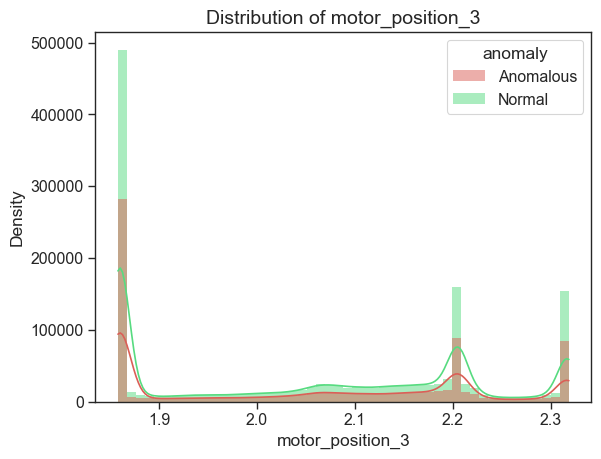

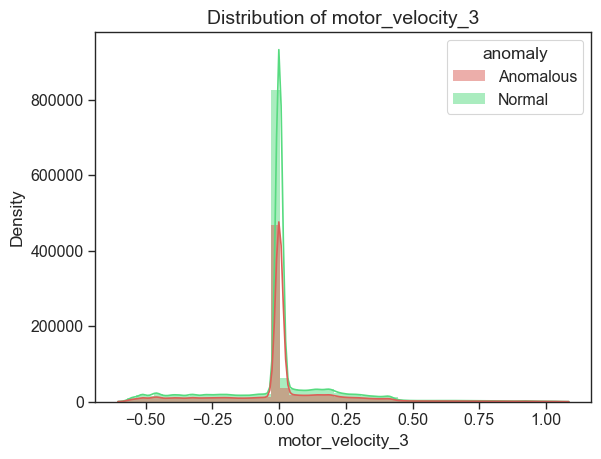

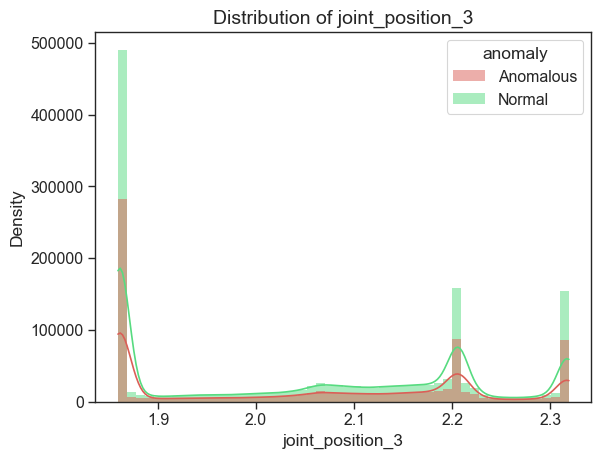

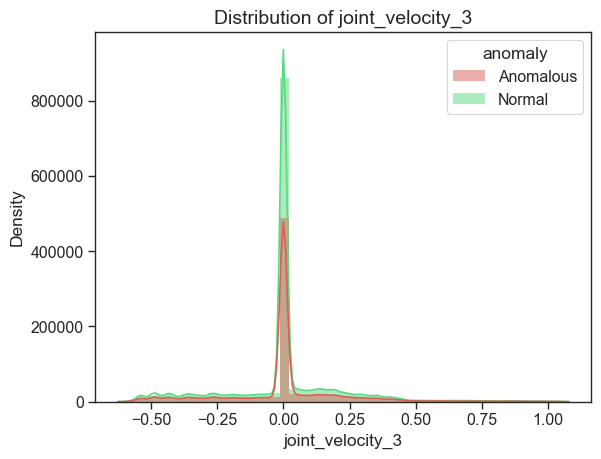

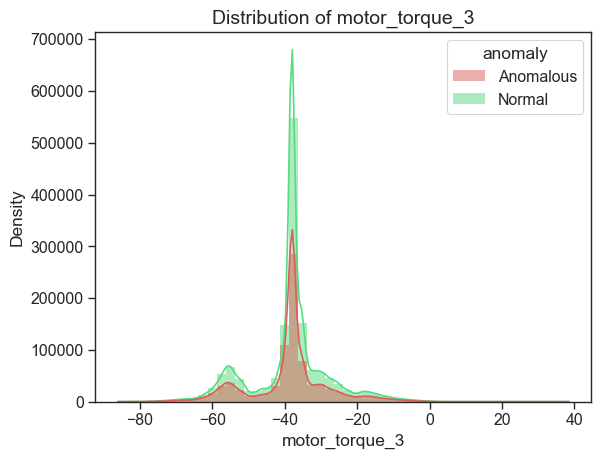

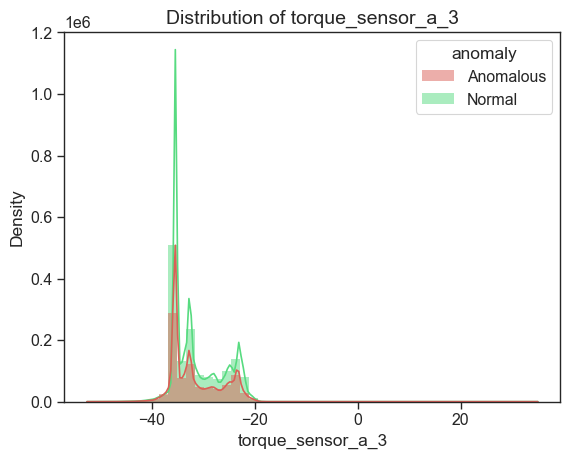

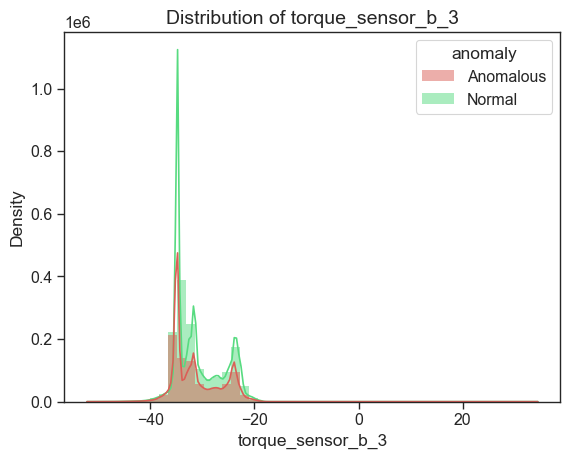

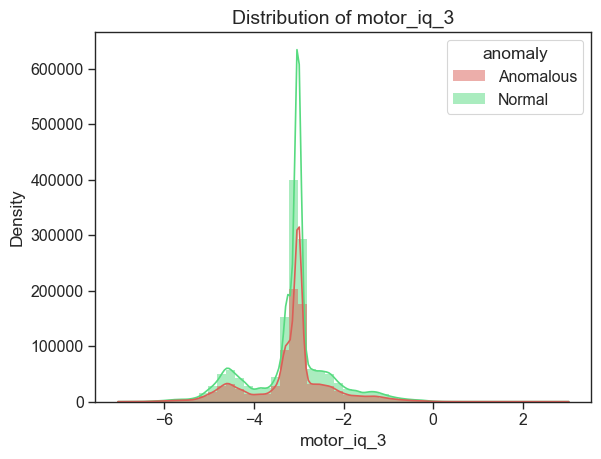

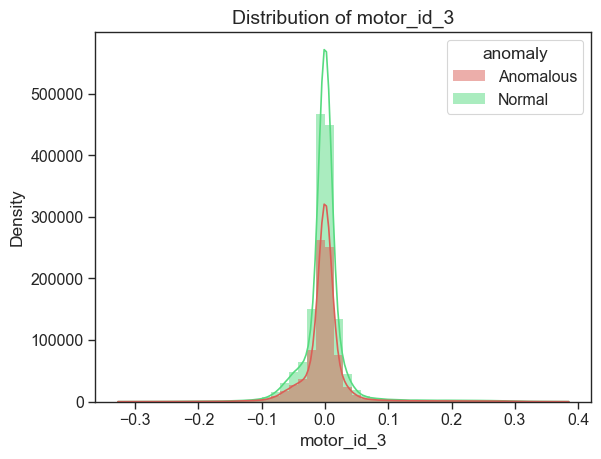

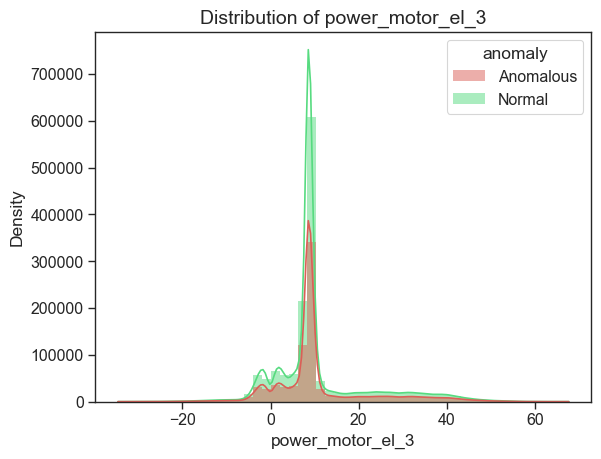

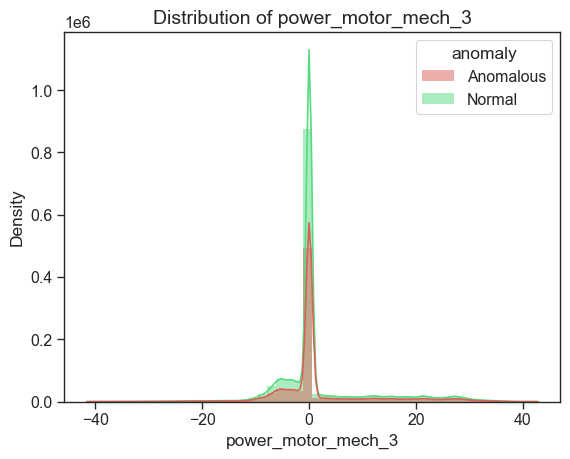

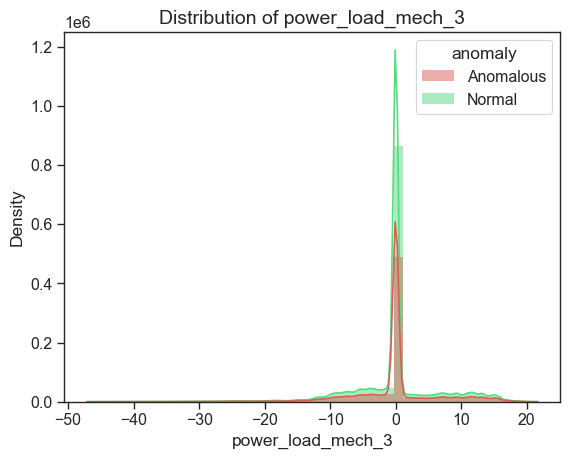

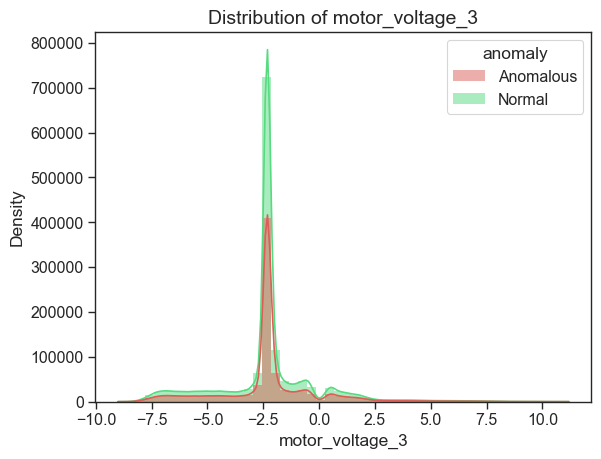

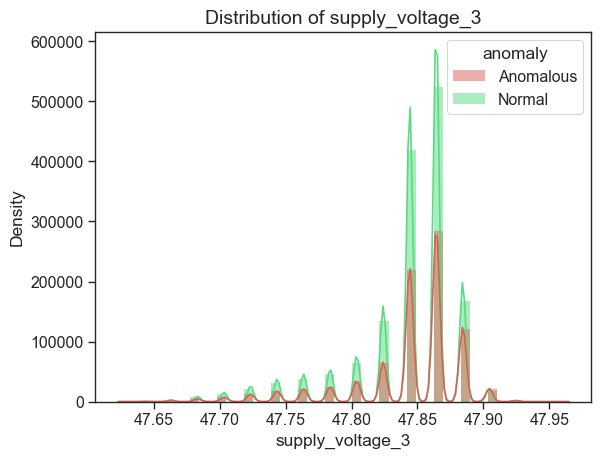

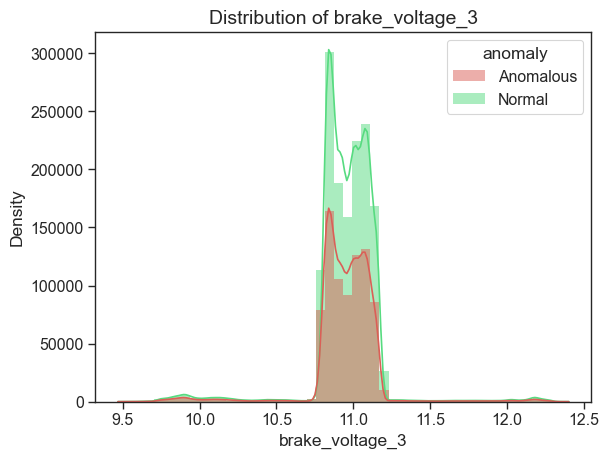

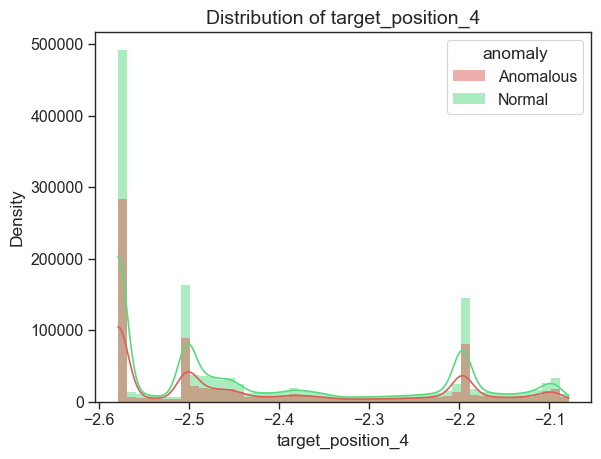

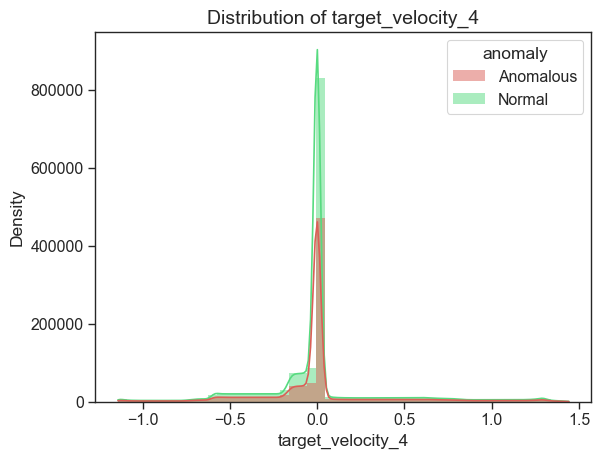

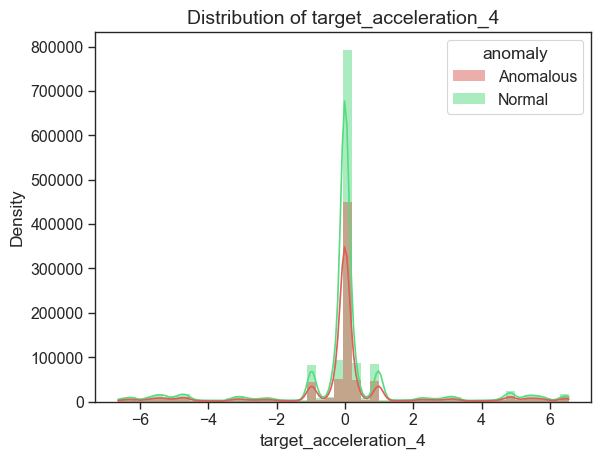

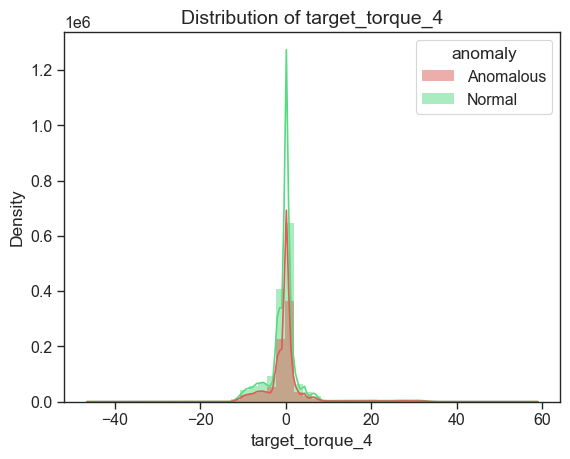

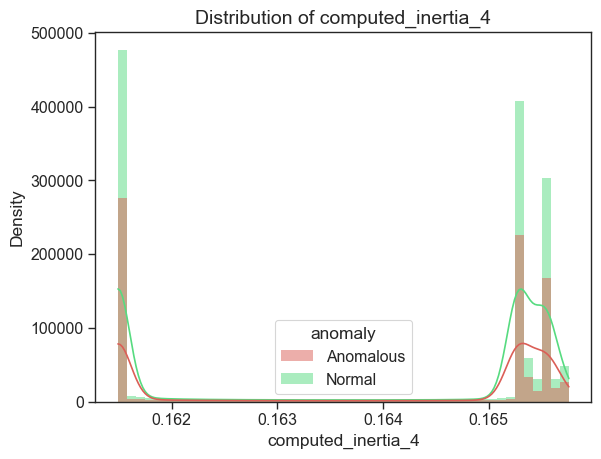

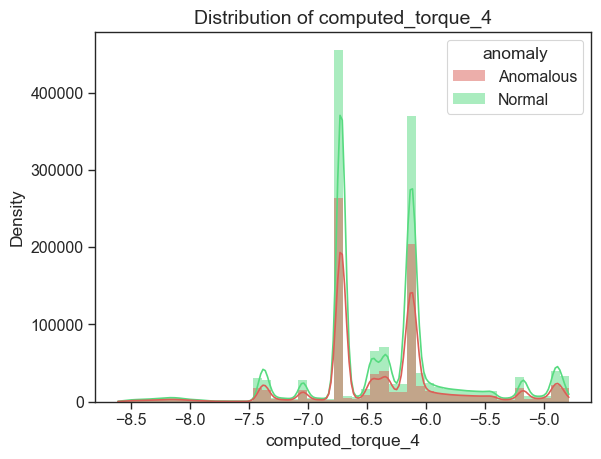

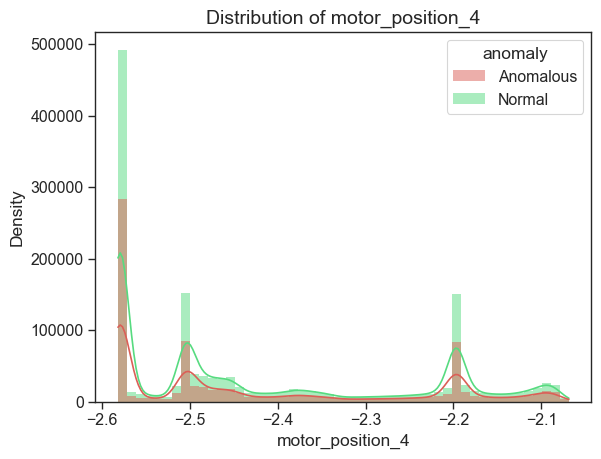

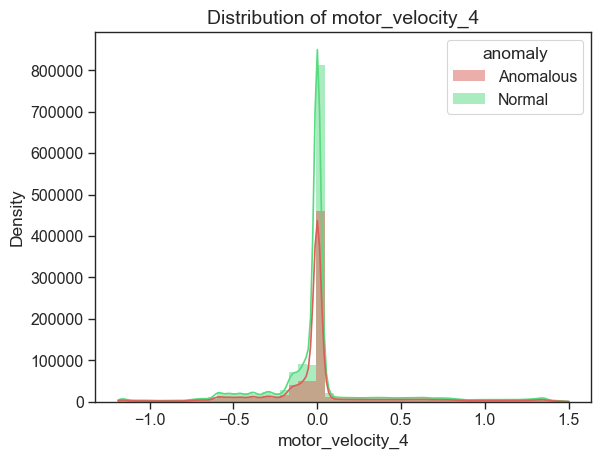

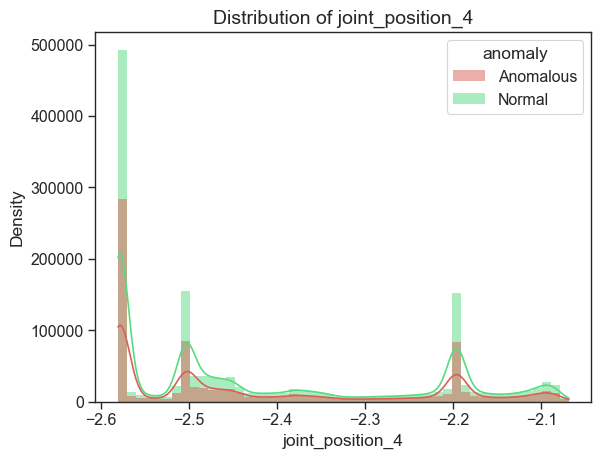

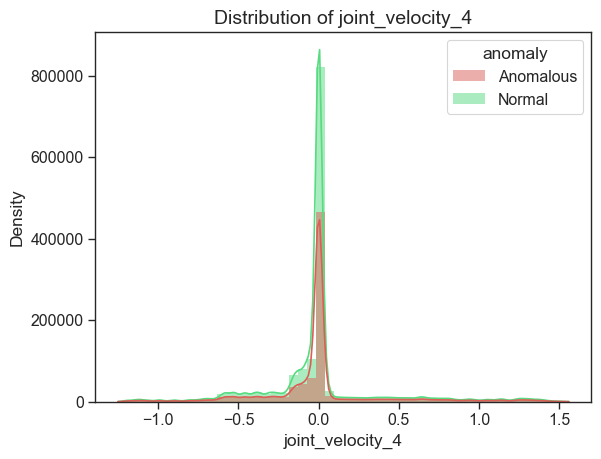

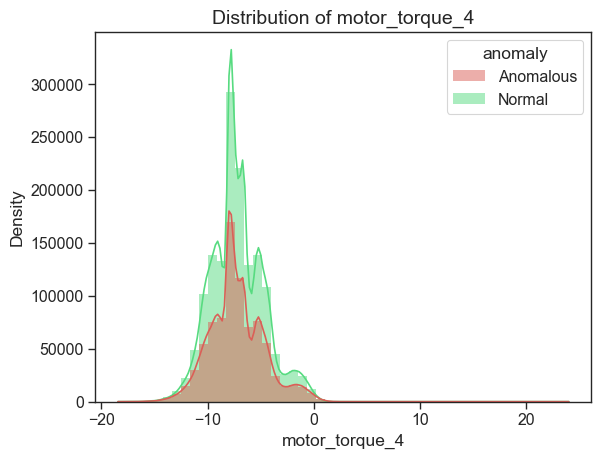

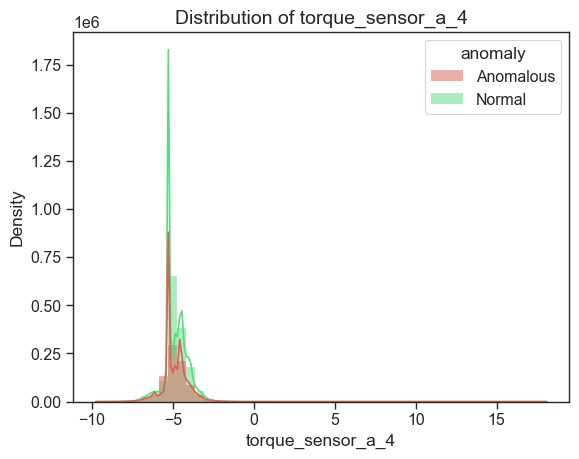

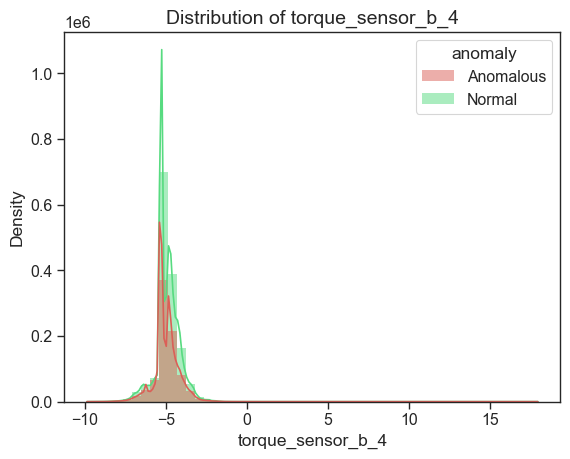

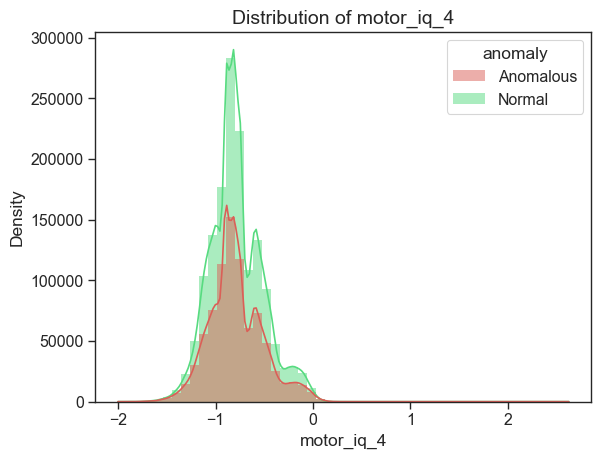

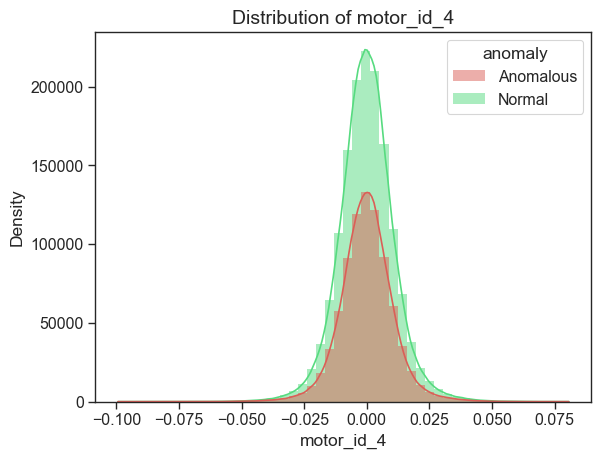

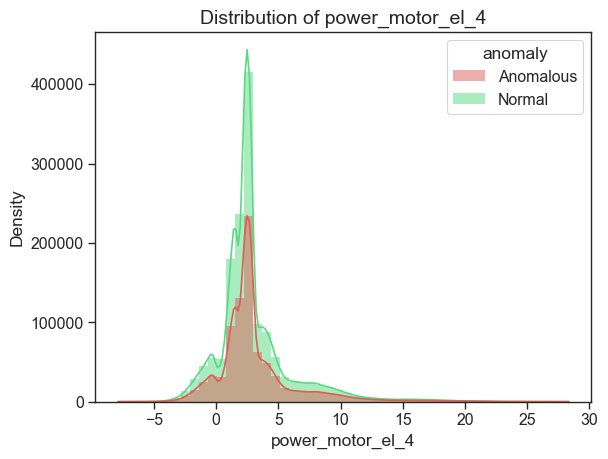

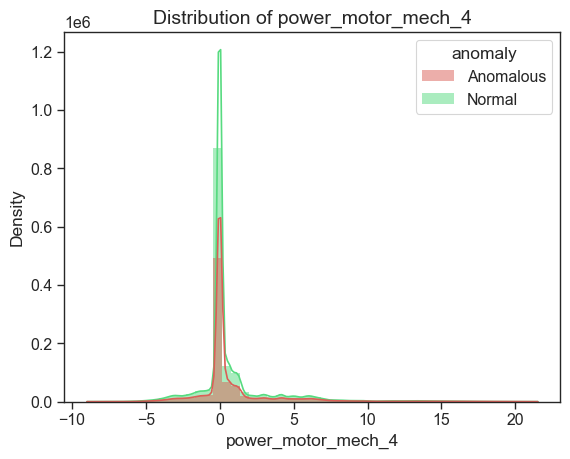

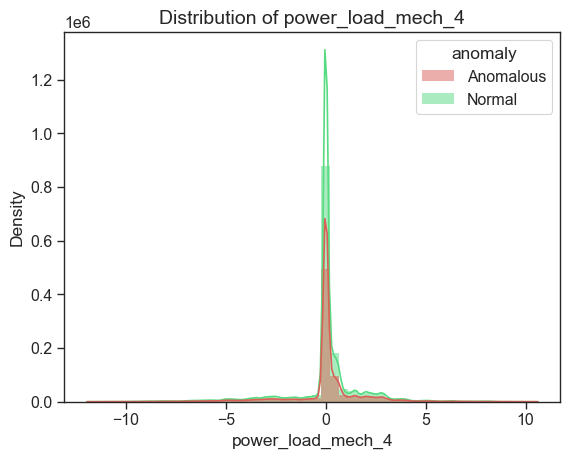

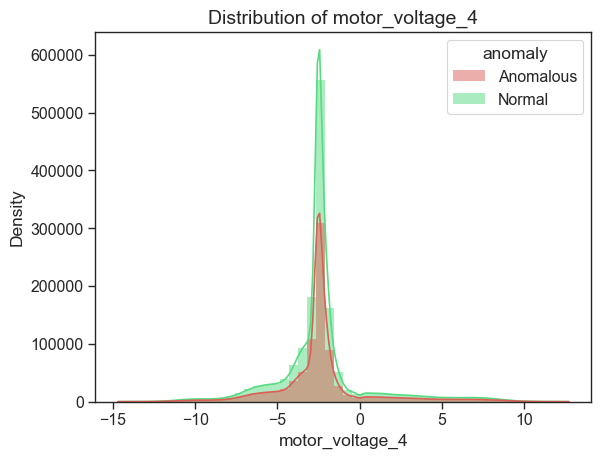

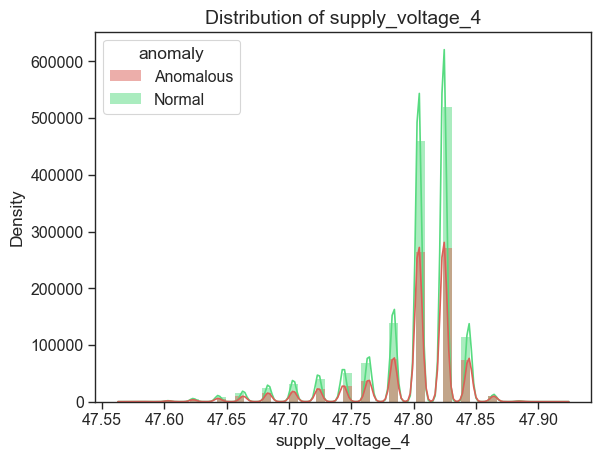

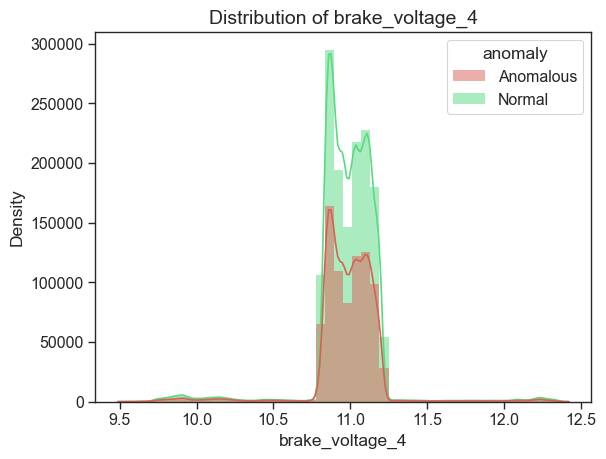

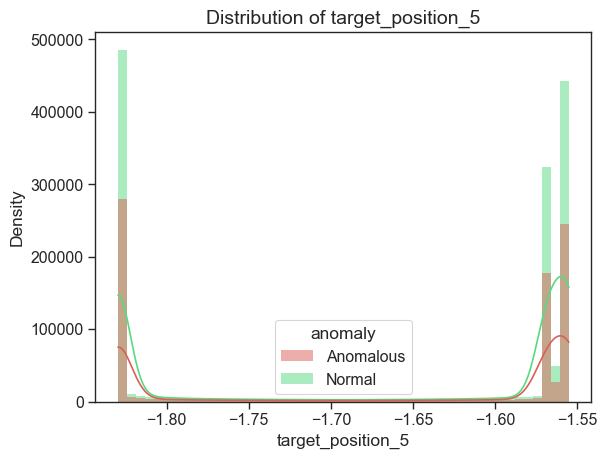

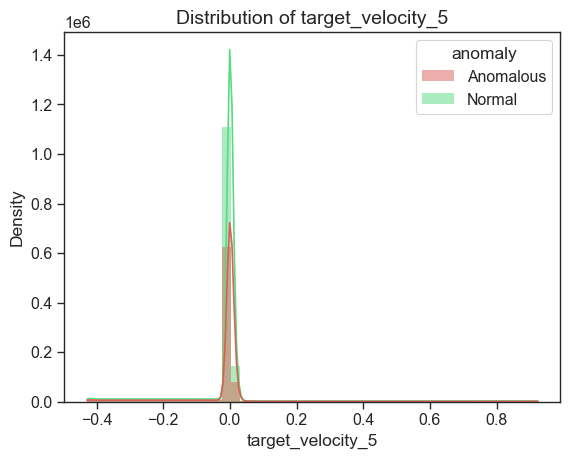

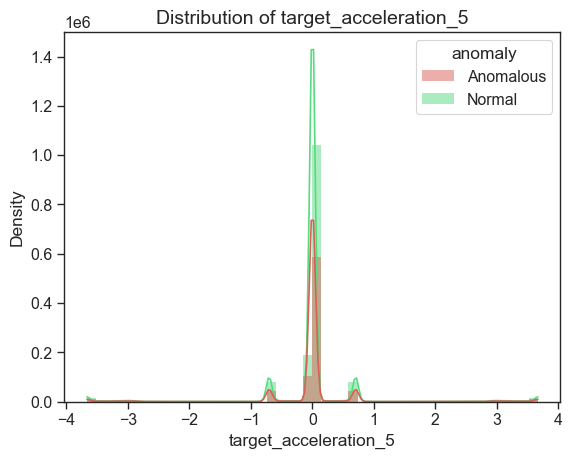

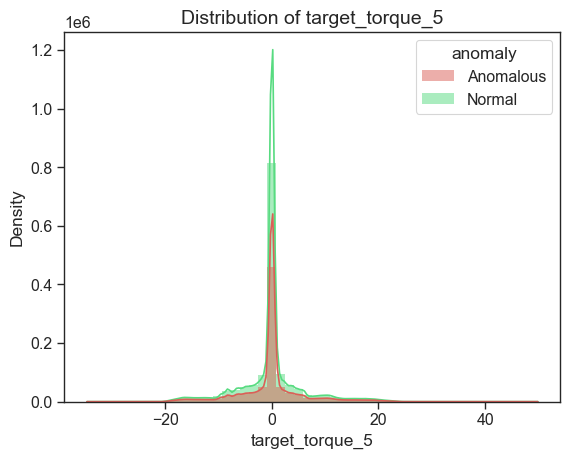

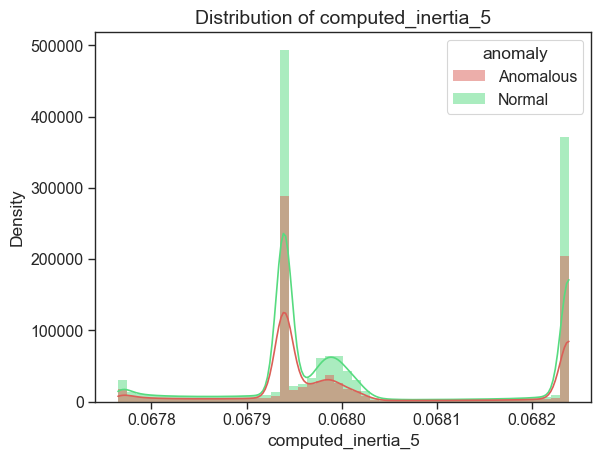

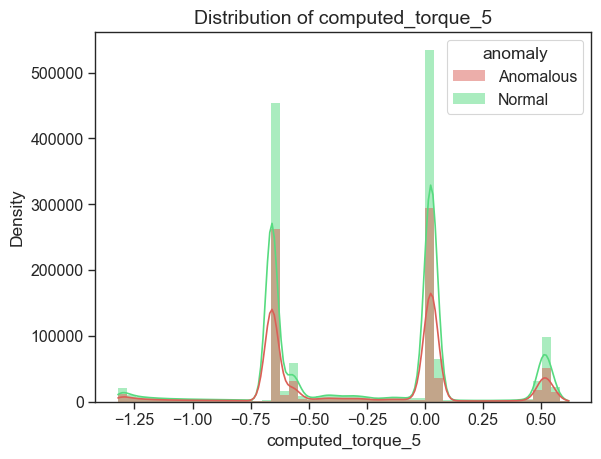

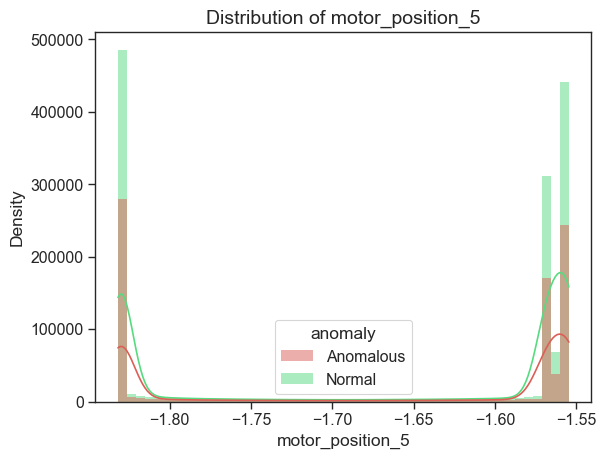

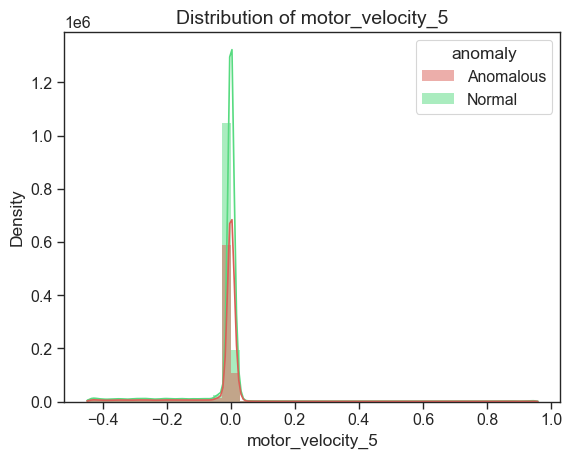

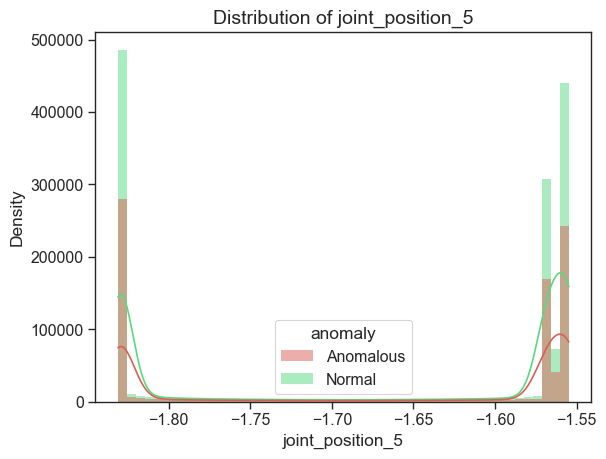

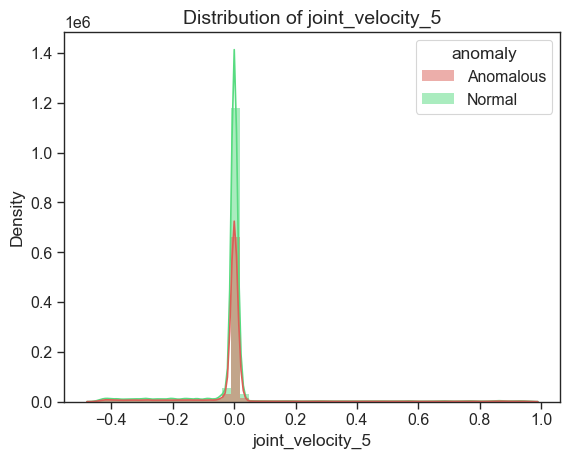

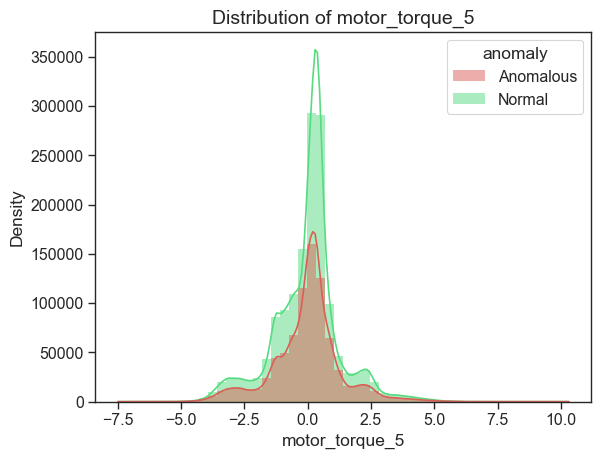

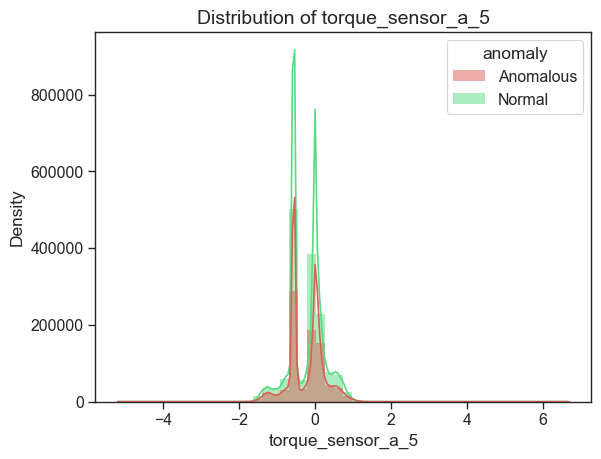

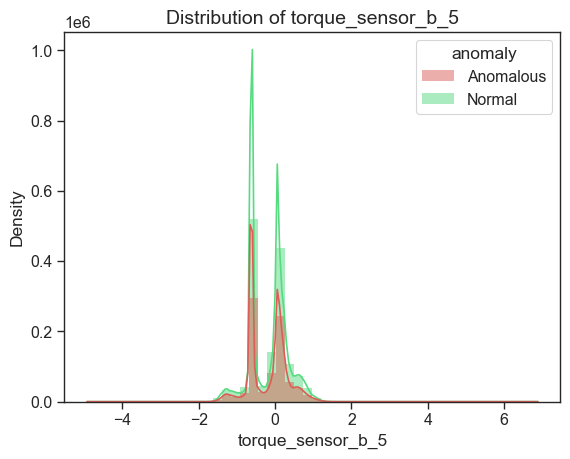

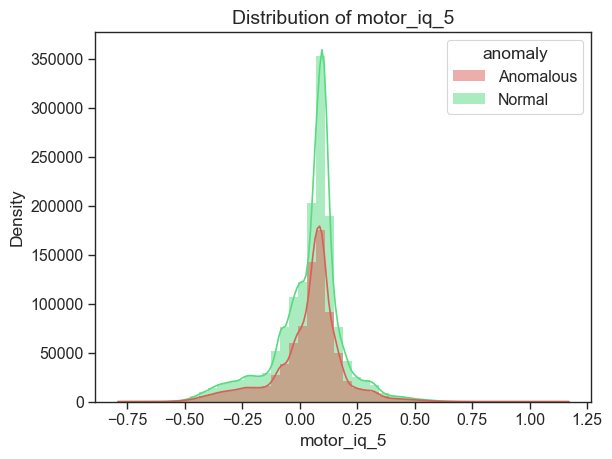

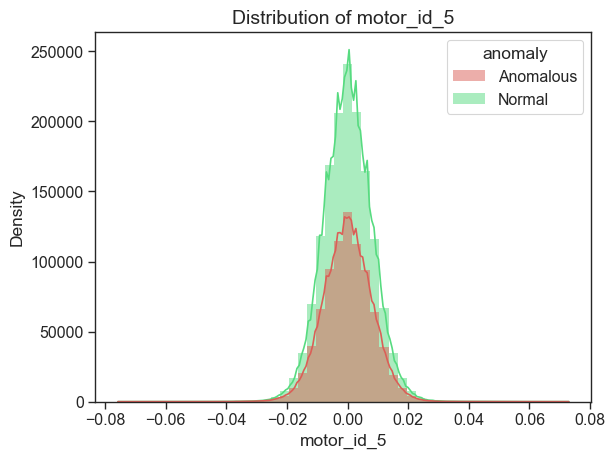

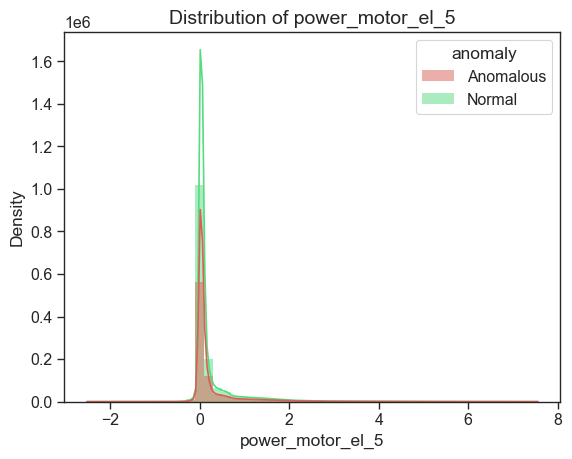

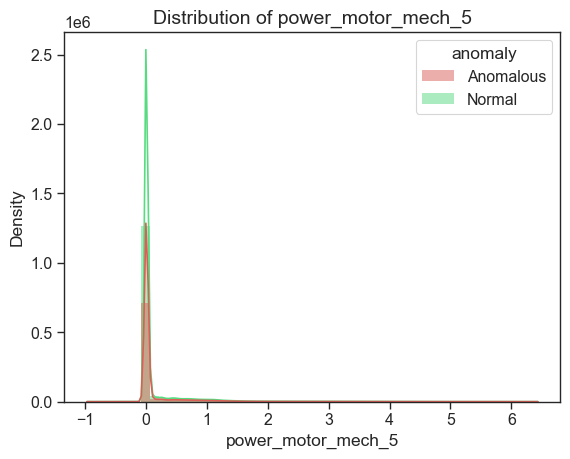

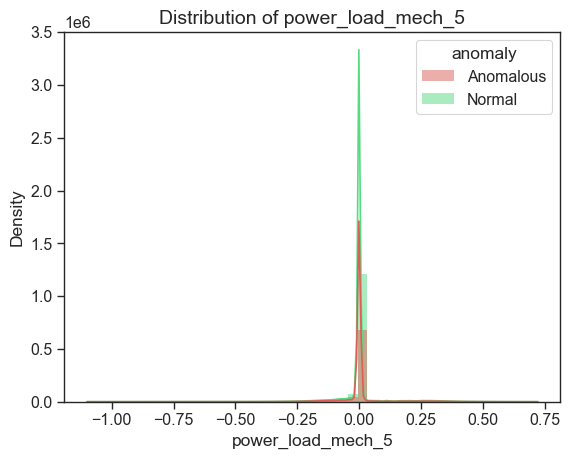

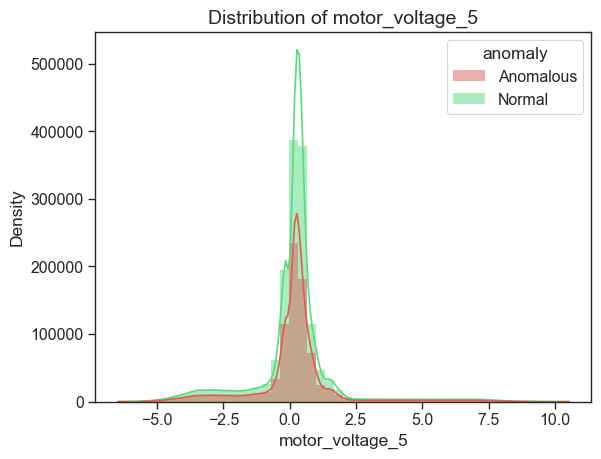

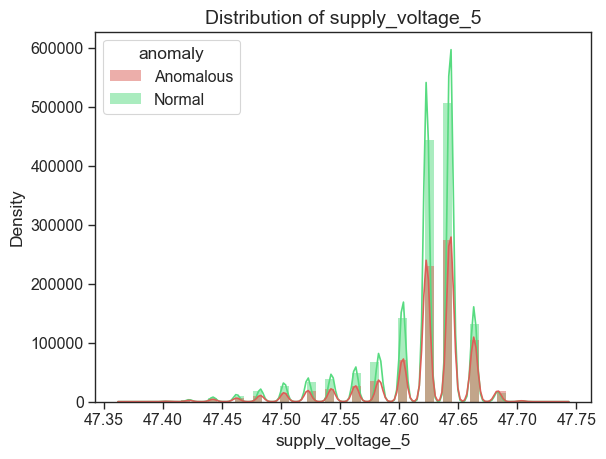

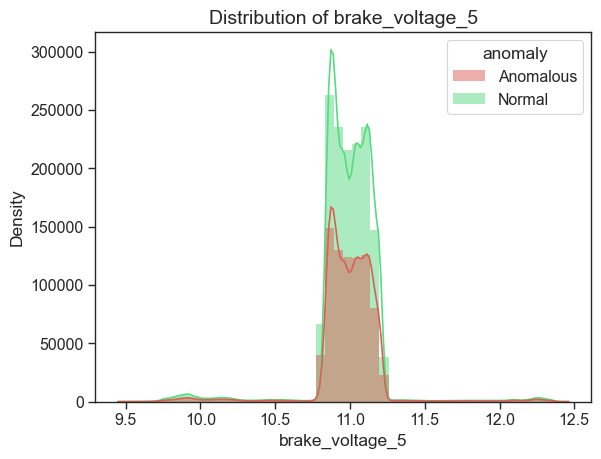

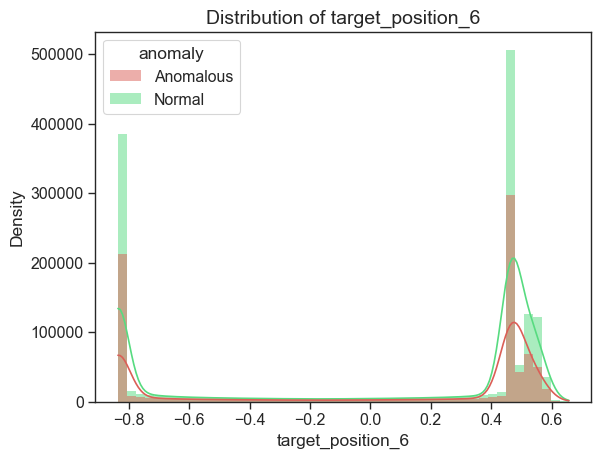

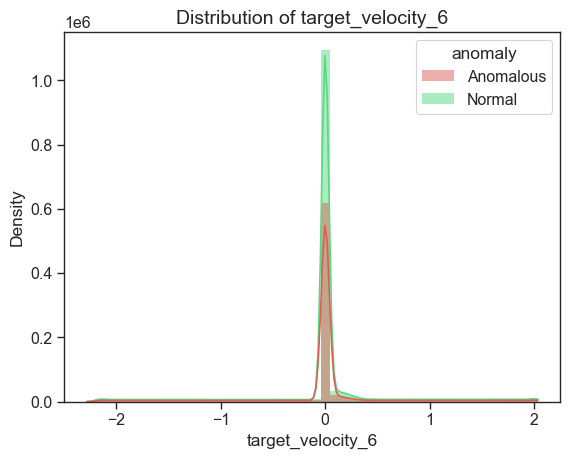

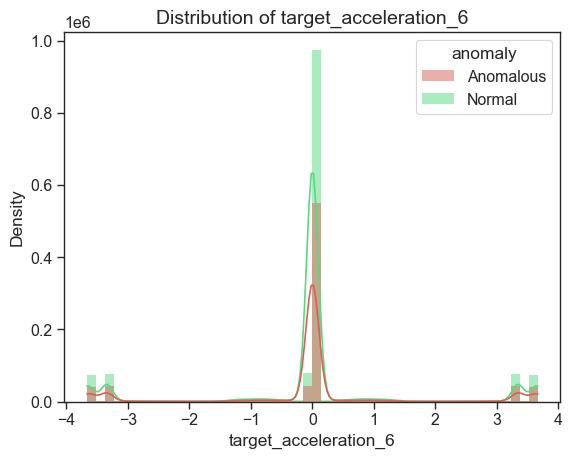

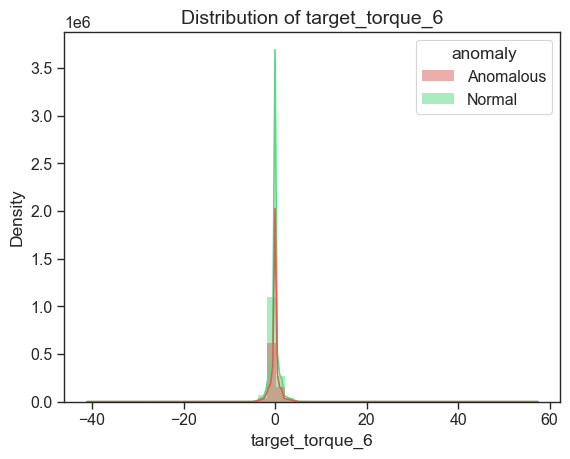

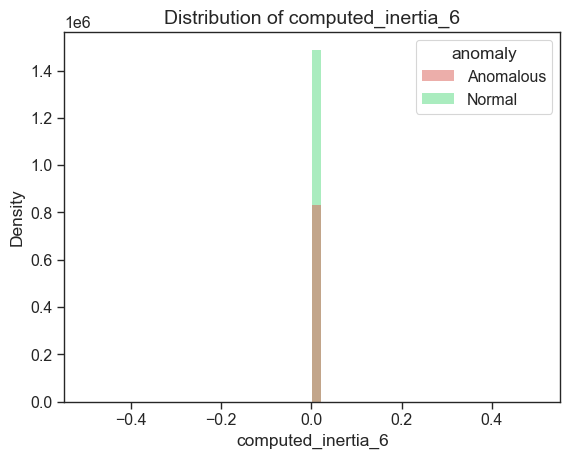

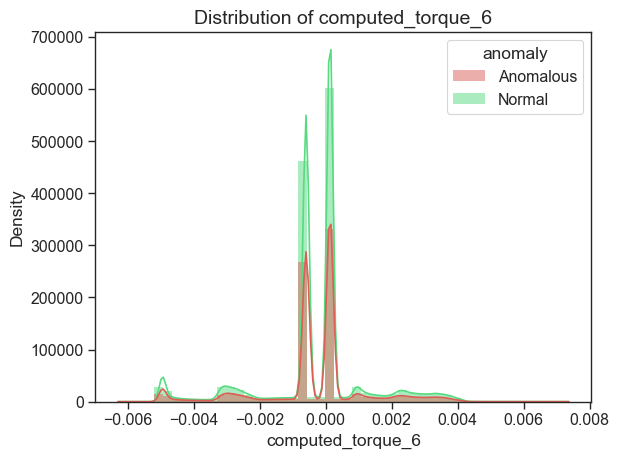

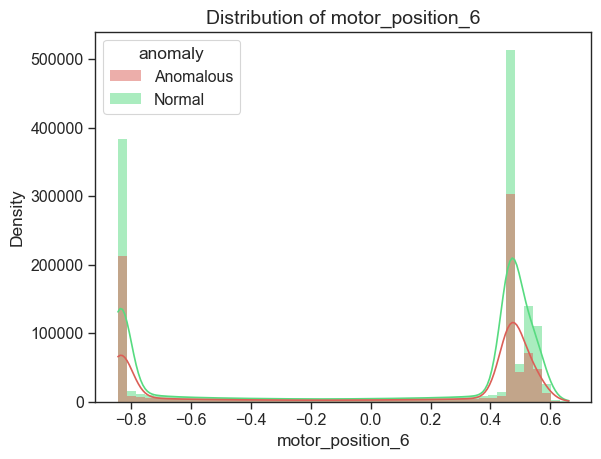

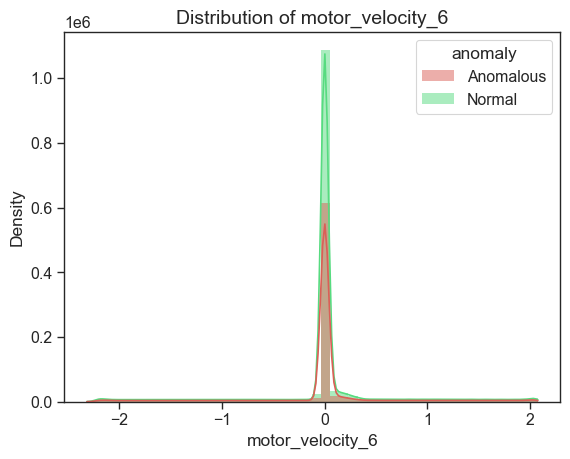

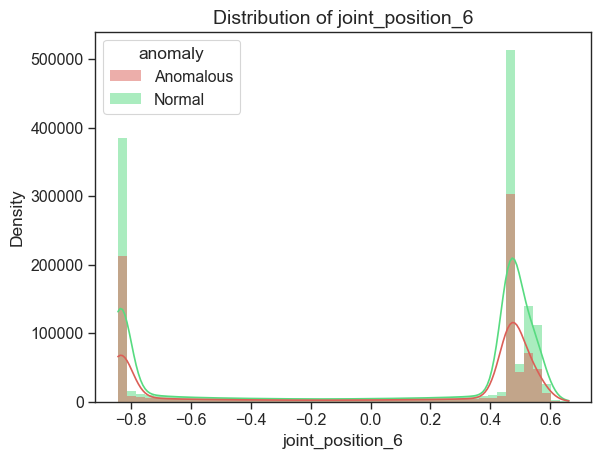

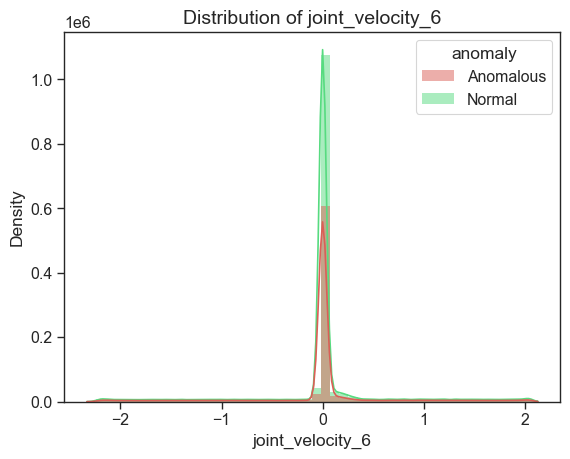

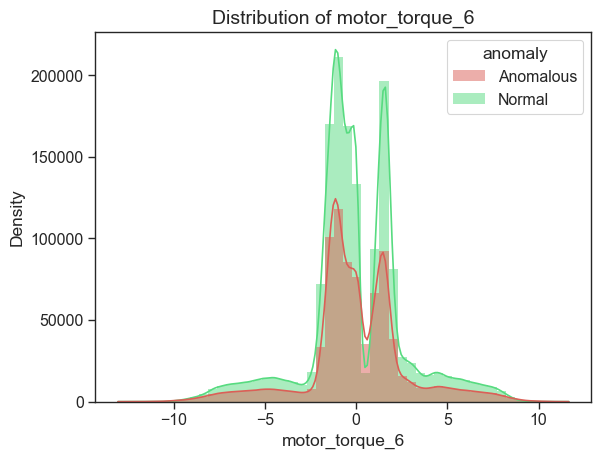

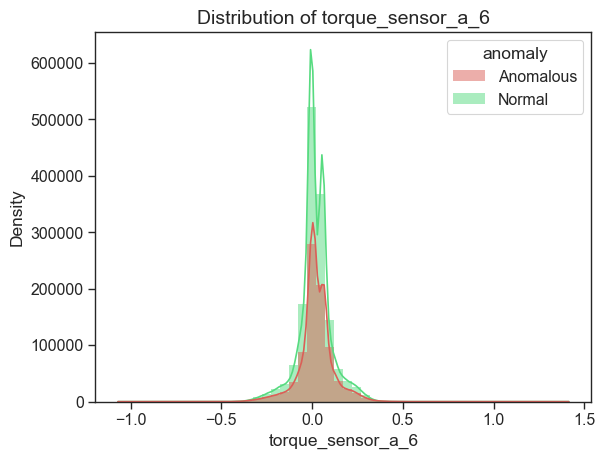

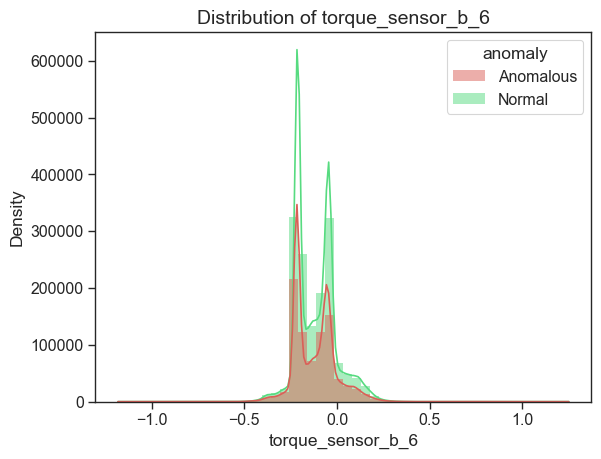

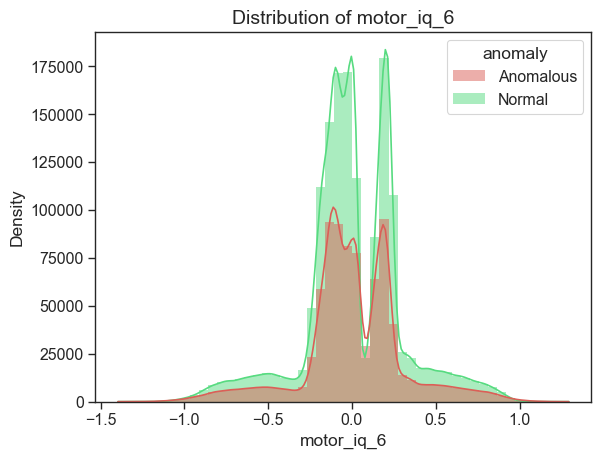

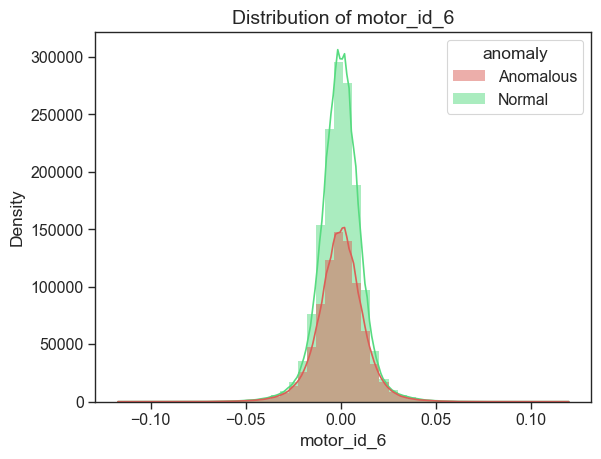

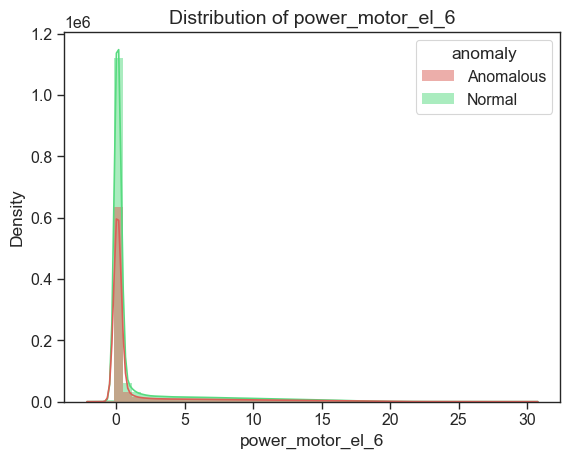

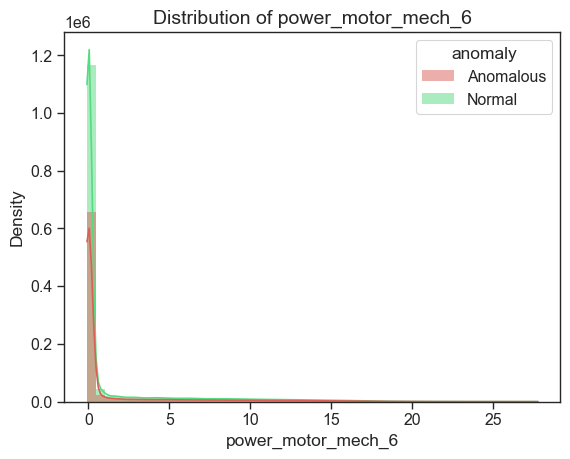

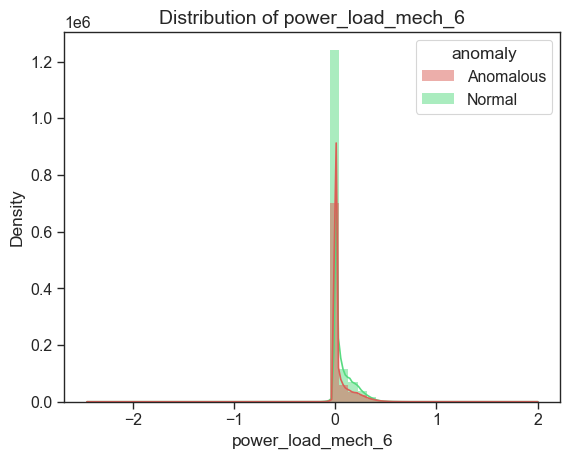

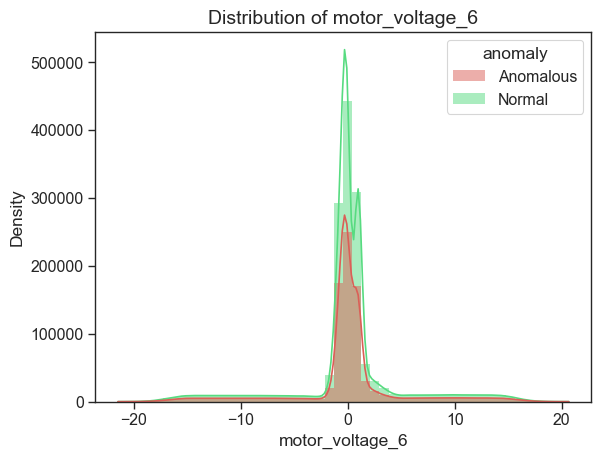

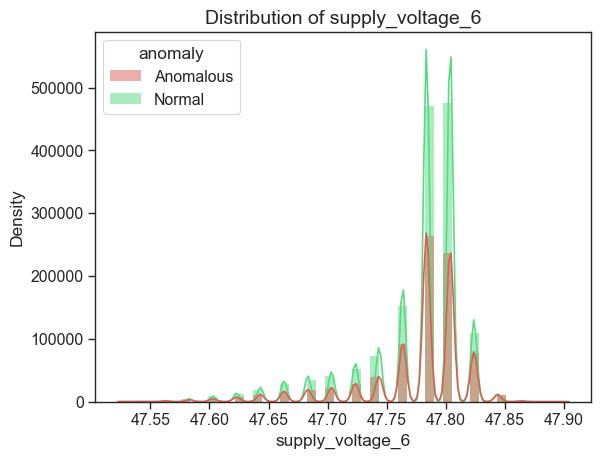

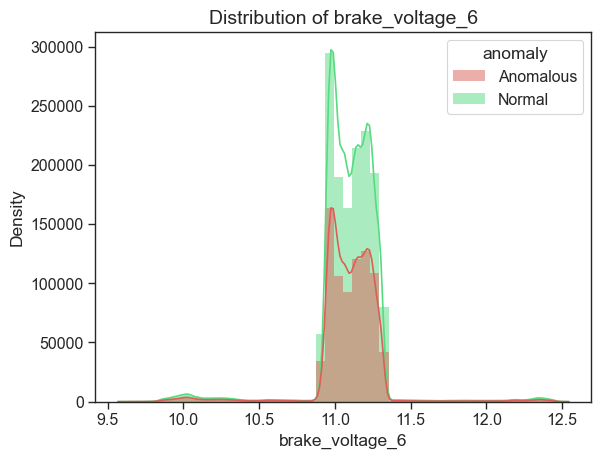

In [20]:
# Get the list of all columns in the dataset except 'anomaly'
columns = df.columns.tolist()
columns.remove('anomaly')
columns.remove('time')

# Create a distribution for each predictors in the dataset
for column in columns:
    plot_dist_btw_anomaly_normal(df, column)